# Problem Statement: What makes an Anime good?

In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# regex
import re

# Import Models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from random import randint

# Import Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 

In [2]:
# The Anime Character Traits Dataset
ani_t = pd.read_csv("Datasets/Anime_Triats.csv")

# The Anime Score Dataset
ani_s = pd.read_csv("Datasets/24000_anime_stats_022123.csv")

#### Regex expressions to clean the Strings

In [3]:
# regex for only letters and space
regexL = re.compile('[^a-zA-Z ]')
# regex for alpha-numeric and space
regexAN = re.compile('[^a-zA-Z0-9 ]')

### What does each column mean in the Anime Character Traits Dataset?
#### Id: This is the ranking of the Anime Character against all other characters.
#### Names: This is the name of that particular Anime Character.
#### Tags: This are the tags of how members have categorised and view the character traits.
#### Anime/Manga: The Anime/Mange the character is from.

In [4]:
ani_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119825 entries, 0 to 119824
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Id          119825 non-null  int64 
 1   Names       119824 non-null  object
 2   Hair_Color  96059 non-null   object
 3   Gender      113212 non-null  object
 4   Tags        119391 non-null  object
 5   Anime       104426 non-null  object
 6   Manga       35540 non-null   object
dtypes: int64(1), object(6)
memory usage: 6.4+ MB


In [5]:
ani_t

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga
0,0,L,Black Hair,Male,"['Analytical', 'Barefoot', 'Detective', 'Eye B...","['Death Note', 'Death Note Rewrite 1: Visions ...","['Death Note', 'Death Note: L Change the World..."
1,1,Kakashi HATAKE,Grey Hair,Male,"['Adult', 'Anti-Gravity Hair', 'Beastmaster', ...","['Boruto: Naruto Next Generations', 'Boruto: N...",['Boruto: Naruto the Movie Tokubetsu Bangai-he...
2,2,Edward ELRIC,Blonde Hair,Male,"['Alchemist', 'Arm Blades', 'Artificial Limb',...","['Fullmetal Alchemist', 'Fullmetal Alchemist: ...","['Fullmetal Alchemist', 'Fullmetal Alchemist G..."
3,3,Levi,Black Hair,Male,"['Adult', 'Military', 'Ruthless', 'Stoic', 'Sw...","['Attack on Skytree', 'Attack on Titan', 'Atta...","['Attack on Titan', 'Attack on Titan: Junior H..."
4,4,Light YAGAMI,Brown Hair,Male,"['Analytical', 'Big Ego', 'Charismatic', 'God ...","['Death Note', 'Death Note Rewrite 1: Visions ...",['Death Note']
...,...,...,...,...,...,...,...
119820,123369,Narrator,NaN,Male,['Gold Lightan: Golden Warrior'],NaN,NaN
119821,123370,Aoi,Purple Hair,Female,"['Editor', 'Hair Antenna']",['Kemeko Deluxe!'],['Kemeko DX!']
119822,123371,Kiriko,Black Hair,Female,"['Eye Patch', 'Robot', 'Rosy Cheeks']",['Kemeko Deluxe!'],['Kemeko DX!']
119823,123372,Ryouta MINAMINO,Blonde Hair,Male,"['Anti-Gravity Hair', 'Glasses', 'Headband']",['Kemeko Deluxe!'],['Kemeko DX!']


### What does each column mean for the Anime Stats Dataset?
#### Rank: Where the anime ranks based on its score. (Lower is better)
#### Title: The Name of that particular Anime.
#### Score: The weighted score given by the the members of the My Anime List site. (Higher is better)
#### Type: The broadcast method used, TV, Movie, ONA (original net animation: broadcasted online), OVA (original animation video: without broadcast).
#### Source: Where was the source material gotten from to make the Anime (Novel, Manga etc.)
#### Status: Whether it has finished airing.
#### Studios: The Anime Studios that were involved in the making of the Anime.
#### Genres: The Genre of the Anime (Action, Adventure, Slice of Life etc.)
#### Themes: The traits of the anime (Military, War, Isekai etc.)
#### Demographic: Who the target audience is (Teens, Girls, Adults).
#### Age Rating: The Age Rating given to any type of media (PG-13, R21 etc.)
#### Popularity: Based on the number of members that have the Anime on their saved list and have given a Score. (Lower is better)
#### Members: The number of members on the My Anime List site that have the anime on their watchlist.
#### Adaptation: The main source for the anime.
#### Characters: The Anime Characters in the Anime.
#### Roles: The Anime Character's role in the anime (Main, Supporting etc.)
#### Voice Actors: The voice actors for the Anime Characters.

In [6]:
ani_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        24000 non-null  int64  
 1   Rank              22122 non-null  float64
 2   Title             24000 non-null  object 
 3   Link              24000 non-null  object 
 4   Score             15215 non-null  float64
 5   Type              23976 non-null  object 
 6   # Episodes        23976 non-null  object 
 7   Source            23976 non-null  object 
 8   Status            23976 non-null  object 
 9   Premiered         7477 non-null   object 
 10  Aired Date        23976 non-null  object 
 11  Studios           23976 non-null  object 
 12  Genres            19326 non-null  object 
 13  Themes            13168 non-null  object 
 14  Demographic       9287 non-null   object 
 15  Duration          23976 non-null  object 
 16  Age Rating        23976 non-null  object

In [7]:
ani_s

,Unnamed: 0,Rank,Title,Link,Score,Type,# Episodes,Source,Status,Premiered,...,Adaptation,Sequel,Prequel,Characters,Role,Voice Actors,Openings,Opening Artists,Endings,Ending Artists
0,0,1.0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.11,TV,64,Manga,Finished Airing,Spring 2009,...,Fullmetal Alchemist,NaN,NaN,"['Elric, Edward', 'Elric, Alphonse', 'Mustang,...","['Main', 'Main', 'Supporting', 'Supporting', '...","['Park, Romi', 'Kugimiya, Rie', 'Miki, Shinich...","['again', 'Hologram (ホログラム)', 'Golden Time Lov...","['YUI', 'NICO Touches the Walls', 'Sukima Swit...","['Uso (嘘)', 'LET IT OUT', 'Tsunaida Te (つないだ手)...","['SID', 'Miho Fukuhara', ""Lil'B"", 'SCANDAL', '..."
1,1,2.0,Bleach: Sennen Kessen-hen,https://myanimelist.net/anime/41467/Bleach__Se...,9.10,TV,13,Manga,Finished Airing,Fall 2022,...,Bleach,Bleach: Sennen Kessen-hen - Ketsubetsu-tan,Bleach,"['Kurosaki, Ichigo', 'Kuchiki, Rukia', 'Inoue,...","['Main', 'Main', 'Main', 'Main', 'Main', 'Main...","['Morita, Masakazu', 'Orikasa, Fumiko', 'Matsu...",['スカー'],['キタニタツヤ'],"['Rapport', '最果て', 'Number One']","['キタニタツヤ', 'SennaRin', 'Shiro Sagisu, Hazel Fe..."
2,2,3.0,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,9.08,TV,24,Visual novel,Finished Airing,Spring 2011,...,Steins;Gate,Steins;Gate: Oukoubakko no Poriomania,NaN,"['Okabe, Rintarou', 'Makise, Kurisu', 'Shiina,...","['Main', 'Main', 'Main', 'Main', 'Supporting',...","['Miyano, Mamoru', 'Imai, Asami', 'Hanazawa, K...",['Hacking to the Gate'],['Kanako Itou'],['Toki Tsukasadoru Juuni no Meiyaku (刻司ル十二ノ盟約)...,"['Yui Sakakibara', 'Takeshi Abo', 'Kanako Itou..."
3,3,4.0,Gintama°,https://myanimelist.net/anime/28977/Gintama°,9.07,TV,51,Manga,Finished Airing,Spring 2015,...,Gintama,Gintama.,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"['Sakata, Gintoki', 'Kagura', 'Shimura, Shinpa...","['Main', 'Main', 'Main', 'Supporting', 'Suppor...","['Sugita, Tomokazu', 'Kugimiya, Rie', 'Sakaguc...","['DAY×DAY', 'Pride Kakumei (プライド革命)', 'Saigo m...","['BLUE ENCOUNT', 'CHiCO with HoneyWorks', 'Aqu...","['DESTINY', 'Saigo made II (最後までⅡ)', 'Pride Ka...","['Negoto', 'Aqua Timez', 'CHiCO with HoneyWork..."
4,4,5.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,https://myanimelist.net/anime/43608/Kaguya-sam...,9.07,TV,13,Manga,Finished Airing,Spring 2022,...,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,Kaguya-sama wa Kokurasetai: First Kiss wa Owar...,Kaguya-sama wa Kokurasetai? Tensai-tachi no Re...,"['Shinomiya, Kaguya', 'Ishigami, Yuu', 'Fujiwa...","['Main', 'Main', 'Main', 'Main', 'Main', 'Supp...","['Koga, Aoi', 'Suzuki, Ryouta', 'Kohara, Konom...",['GIRI GIRI feat Suu (GIRI GIRI feat. すぅ)'],['Masayuki Suzuki'],"['GIRI GIRI feat Suu (GIRI GIRI feat. すぅ)', 'H...","['Masayuki Suzuki', 'Airi Suzuki', 'Miyuki Shi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23995,NaN,Aoi Taiken,https://myanimelist.net/anime/8574/Aoi_Taiken,4.61,OVA,2,Unknown,Finished Airing,NaN,...,NaN,NaN,NaN,[],[],[],[],[],[],[]
23996,23996,NaN,Ikenai Boy,https://myanimelist.net/anime/17823/Ikenai_Boy,4.61,OVA,1,Manga,Finished Airing,NaN,...,NaN,Ikenai Boy: Ikasu Maruhi Hand Power,NaN,[],['Animation Director'],[],[],[],[],[]
23997,23997,NaN,Sei Michaela Gakuen Hyouryuuki II,https://myanimelist.net/anime/2240/Sei_Michael...,4.59,OVA,2,Unknown,Finished Airing,NaN,...,NaN,NaN,Sei Michaela Gakuen Hyouryuuki,"['Kozue', 'Miuchi, Youko', 'Kumi', 'Gonza', 'S...","['Main', 'Supporting', 'Supporting', 'Supporti...",[],[],[],[],[]
23998,23998,NaN,Dream Hazard: Akuma no Program,https://myanimelist.net/anime/4178/Dream_Hazar...,4.59,OVA,1,Manga,Finished Airing,NaN,...,NaN,NaN,NaN,['Kaori'],['Main'],[],[],[],[],[]


# Data Cleaning

## Cleaning the ani_t, the Anime Character Traits Dataset.

#### In this frame we remove the rows with NaN as values for the columns of "Anime", "Names". This is because without these, it cannot be matched to the correct anime.

In [8]:
# Dup the main dataframe
clean_ani_t = ani_t.copy()

col_to_clean = ["Anime", "Names"]

# remove rows with tags with NaN
for col in col_to_clean:
    clean_ani_t = clean_ani_t.loc[~clean_ani_t[col].isna()]

# reset the index
clean_ani_t.index = range(len(clean_ani_t))

#### This is to turn the List which is being read as a string back into a List.

In [9]:
# turning selected cols into a list
# NOTE: Can only run once due to the change it types
col_to_clean = ["Tags", "Anime"]

for col in col_to_clean:
    # a temp list to hold list of list values
    tmp = []
    
    for i, l in enumerate(clean_ani_t[col]):
        if (type(l) != str and l.isnan()):
            tmp.append(np.nan)
            continue
        b = l.split(",") # b is a list of the split items of the str of col item
        for i in range(len(b)):
            b[i] = regexAN.sub('', b[i])
        tmp.append(b)

    # overide the Tags column to be a list
    clean_ani_t[col] = tmp

#### This is to remove the space infront of each tag when it has been converted into a List from a String.

In [10]:
# remove the sapce infront of the tags items
for i,l in enumerate(clean_ani_t["Tags"]):
    for j,m in enumerate(l):
        if (m[0] == " "):
            clean_ani_t["Tags"][i][j] = clean_ani_t["Tags"][i][j][1:]

#### This is to make the names all lower case and sorted into a format that is compatible with the the Anime Stats Dataset.

In [11]:
# make all names lower case and first name first
tmp = []
for i, name in enumerate(clean_ani_t["Names"]):
    name = name.split(" ")
    if (len(name) <= 2):
        name.append(name[0])
        name.remove(name[0])
    else:
        up = name[0].isupper()
        for j in range(len(name)):
            if (name[0].isupper() == up):
                name.append(name[0])
                name.remove(name[0])
            else:
                break
    name = " ".join(name)
    tmp.append(name.lower())
clean_ani_t["Names"] = tmp

***

## Cleaning ani_s, the Anime Stats Dataset

#### This is to drop all the unwanted columns.
#### The "Openings", 'Opening Artists', 'Endings', 'Ending Artists' have been deemed un-needed as the the opening and ending songs are not important. This is supported by this quote "If a famous (expensive) composer is doing the music for the show, they will often be asked to contribute the theme songs, as they're likely to be hits no matter who sings them." by Anime News Network founder Justin Sevakis, who had over 20 years of experience in the anime business at the time.
<https://www.animenewsnetwork.com/answerman/2017-05-31/.116809/>

#### The "link" column just links to the page the data was taken from.

In [12]:
# Dup the main dataframe
clean_ani_s = ani_s.copy()

# remove unneeded columns
clean_ani_s = ani_s.drop(columns=['Unnamed: 0', 'Link', "Openings", 'Opening Artists', 'Endings', 'Ending Artists'], axis=1)

# remove NaN from selected cols
col_to_clean = ["Characters", "Role", 'Voice Actors', "Genres"]
for col in col_to_clean:
    clean_ani_s = clean_ani_s.loc[~clean_ani_s[col].isna()]
    
# reset the index
clean_ani_s.index = range(len(clean_ani_s))

#### This is to drop all rows of Animes' that have not finished airing or have not aired, this is because these anime have not been out long enough to recieve a fair evaluation by the people.

In [13]:
clean_ani_s = clean_ani_s.loc[clean_ani_s["Status"] == "Finished Airing"]
# reset the index
clean_ani_s.index = range(len(clean_ani_s))

#### This is to convert the columns into the intended List type instead of a string, as well as turning it all into lower case for Data Processing.

In [14]:
# set 1 of columns to make into a list
# NOTE: Can only run once due to the change it types
col_to_clean = ["Characters", "Role", 'Voice Actors']

for col in col_to_clean:
    # a temp list to hold list of each row
    tmp = []
    for i, l in enumerate(clean_ani_s[col]):
        b = l.replace("',", '@')
        b = b.replace(",", '')
        b = b.replace("@", "',")
        b = b.split(",")
        for j, name in enumerate(b):
            c = regexAN.sub('', name).lower()
            if (c == ""):
                continue
            else:
                # to remove the space infront of the name
                while(c[0] == " "):
                    c = c[1:]
                b[j] = c
            
        tmp.append(b)

    # overide the Tags column to be a list
    clean_ani_s[col] = tmp

# removing rows that do not have a character list    
for i, l in enumerate(clean_ani_s["Characters"]):
    if (l == ['']):
        clean_ani_s = clean_ani_s.drop([i])
        
# reset the index
clean_ani_s.index = range(len(clean_ani_s))

#### This is to clean the "Studios" columns, converting into a List and removing the space infront of the Studio Name when it is being converted.

In [15]:
# cleaning the studios column
tmp = []

for i, string in enumerate(clean_ani_s["Studios"]):
    if (string == "None found, add some" or string == ""):
        tmp.append([])
    else:
        lis = string.split(",")
        for j, std in enumerate(lis):
            # to remove the spaces at the start
            while(std[0] == " "):
                std = std[1:]
            lis[j] = std
        tmp.append(lis)
clean_ani_s["Studios"] = tmp

#### This is to convert the "Genres" column into a List from a String, and removing the space at the back of the Genre during conversion.

In [16]:
# cleaning the genres col to be a proper list without null values
# NOTE: Can only run once due to the change it types
tmp = []
for i, l in enumerate(clean_ani_s["Genres"]):
    b = l.split(",")
    # remove the "" at the end of the list
    while (b[-1] == ""):
        b = b[:-1]
    tmp.append(b)
clean_ani_s["Genres"] = tmp

#### This is to convert the column for "Themes" into a List from a String, and removing the space at the back during conversion.

In [17]:
# cleaning the themes col to be a proper list without null values
# NOTE: Can only run once due to the change it types
tmp = []
for i, l in enumerate(clean_ani_s["Themes"]):
    if (type(l) == float):
        b = []
    else:
        b = l.split(",")
        while (b[-1] == ""):
            b = b[:-1]
    tmp.append(b)
clean_ani_s["Themes"] = tmp

#### This is to remove the '#' before the number in the "Popularity" column and converting it into an Int from a string.

In [18]:
# Make Popularity a number
# NOTE: Can only run once due to the change it types
for i,l in enumerate(clean_ani_s["Popularity"]):
    clean_ani_s["Popularity"][i] = int(l.replace("#",""))
clean_ani_s["Popularity"] = clean_ani_s["Popularity"].astype('int64')

C:\Users\CW\AppData\Local\Temp\ipykernel_7336\790833610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ani_s["Popularity"][i] = int(l.replace("#",""))


#### This is to convert the number of favourites into an Int from a string when the number is in the format of "XXX,XXX" where there are ',' sperating the digits.

In [19]:
# Make Favourites a number
# NOTE: Can only run once due to the change it types
tmp = []
for i,l in enumerate(clean_ani_s["Favorites"]):
    tmp_ = ''.join(x for x in l if x.isdigit())
    tmp.append(int(tmp_))

clean_ani_s["Favorites"] = tmp
clean_ani_s["Favorites"] = clean_ani_s["Favorites"].astype('int64')

#### This is to convert the time for each Anime Episode/ Movie into a time of minutes.

In [20]:
# define a function to convert duration to minutes
def convert_to_minutes(duration):
    if isinstance(duration, str):
        duration = duration.replace("per ep.", "").strip() # remove "per ep." if present
        if "hr." in duration and "min." in duration:
            duration = duration.split(" ")
            hours = int(duration[0])
            minutes = int(duration[2])
            return hours * 60 + minutes
        elif "hr." in duration:
            duration = duration.replace("hr.", "").strip()
            return int(duration) * 60
        elif "min." in duration:
            duration = duration.replace("min.", "").strip()
            return int(duration)
    return None

#Insert new column and remove the old column "Duration"
clean_ani_s["Duration per ep. (mins)"] = clean_ani_s["Duration"].apply(convert_to_minutes)

#### This is to convert the column of "Members" into an Int.

In [21]:
# Change the type of "Members" from string to integer, can only run once coz it is changing the type
clean_ani_s["Members"] = clean_ani_s["Members"].str.replace(",", "").astype(int)

# The end of data cleaning

***

# Data Visualization and Exploratory Analysis 

### Analysis of Type of distribution against Score/ Popularity
#### Plotting the Type of distribution against their Score/ Popularity on a boxplot.

[Text(0.5, 1.0, 'Different Type of distribution against their Scores')]

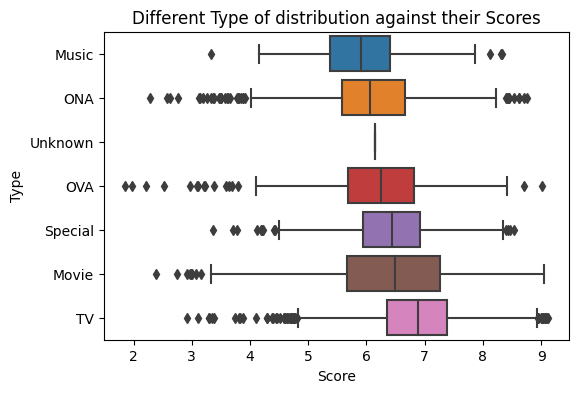

In [22]:
f, ax1 = plt.subplots(1,1,figsize=(6, 4))
a = sb.boxplot(data = clean_ani_s, x = 'Score', y = 'Type', 
           order = clean_ani_s.groupby('Type')['Score'].median().sort_values().index)
ax1.set(title='Different Type of distribution against their Scores')

#### There is very little variation between all the Type of distribution and Score. It shows that the type of distribution is of low correlation with Score.

[Text(0.5, 1.0, 'Different Type of distribution against their Popularity')]

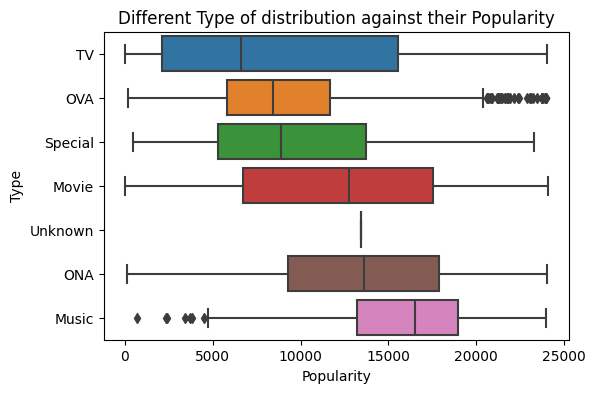

In [23]:
f, ax1 = plt.subplots(1,1,figsize=(6, 4))
a = sb.boxplot(data = clean_ani_s, x = 'Popularity', y = 'Type', 
           order = clean_ani_s.groupby('Type')['Popularity'].median().sort_values().index)
ax1.set(title='Different Type of distribution against their Popularity')

#### There is little variation between all the Type of distribution and Popularity. It shows that generally the Type of distribution are of low correlation with Popularity. 
#### Thus, Type of distribution will not be used as a predictor variable.
***

### Analysis of Genres against Score/ Popularity
#### Getting all the Genres and number of Animes' with that specific Genre.

In [24]:
# to get all the genre types and their count
genres = dict()

for i,l in enumerate(clean_ani_s["Genres"]):
    for var in set(l):
        genres[var] = genres.get(var, 0) + 1

genres = pd.DataFrame(data = genres, index = ["Count"])
genres = genres.transpose()
genres = genres.reset_index()
genres = genres.rename({"index": "Genres"}, axis=1)
genres = genres.sort_values(by=['Count'], ascending=False)
genres = genres.loc[genres["Count"] > 10]
# reset the index
genres.index = range(len(genres))
genres

,Genres,Count
0,Comedy,6757
1,Fantasy,4805
2,Action,4294
3,Adventure,3620
4,Sci-Fi,2939
5,Drama,2720
6,Romance,1912
7,Slice of Life,1675
8,Supernatural,1487
9,Hentai,1398


#### Splitting the anime by their respective Genres.

In [25]:
# spliting the dataset by genre
df_dict_genres = dict()

# for each specific genre get all anime with that genre
for i, gen in enumerate(genres["Genres"]):
    tmp = clean_ani_s.copy()
    drop_ = [x for x in range(len(tmp))]
    for j, gen_list in enumerate(clean_ani_s["Genres"]):
        if gen in gen_list:
            drop_.remove(j)
    # drop all rows without the genre
    tmp = tmp.drop(index = drop_)
    # reset the index
    tmp.index = range(len(tmp))
    # add the dataframe into a dictionary
    df_dict_genres[gen] = tmp


In [26]:
# Assign each of the respective dataframe with a tag of genre category
for i, gen in enumerate(genres["Genres"]):
    df_dict_genres[gen] = df_dict_genres[gen].assign(Genre=gen)

In [27]:
# concate all Animes split by their Genres into a single Dataframe
for i, gen in enumerate(genres["Genres"]):
    if (i == 0):
        gen_concat = df_dict_genres[gen]
    else:
        gen_concat = pd.concat([gen_concat,df_dict_genres[gen]])

#### Plotting the different Genres against their Score/ Popularity on a boxplot.

[Text(0.5, 1.0, 'Different anime genres against their scores')]

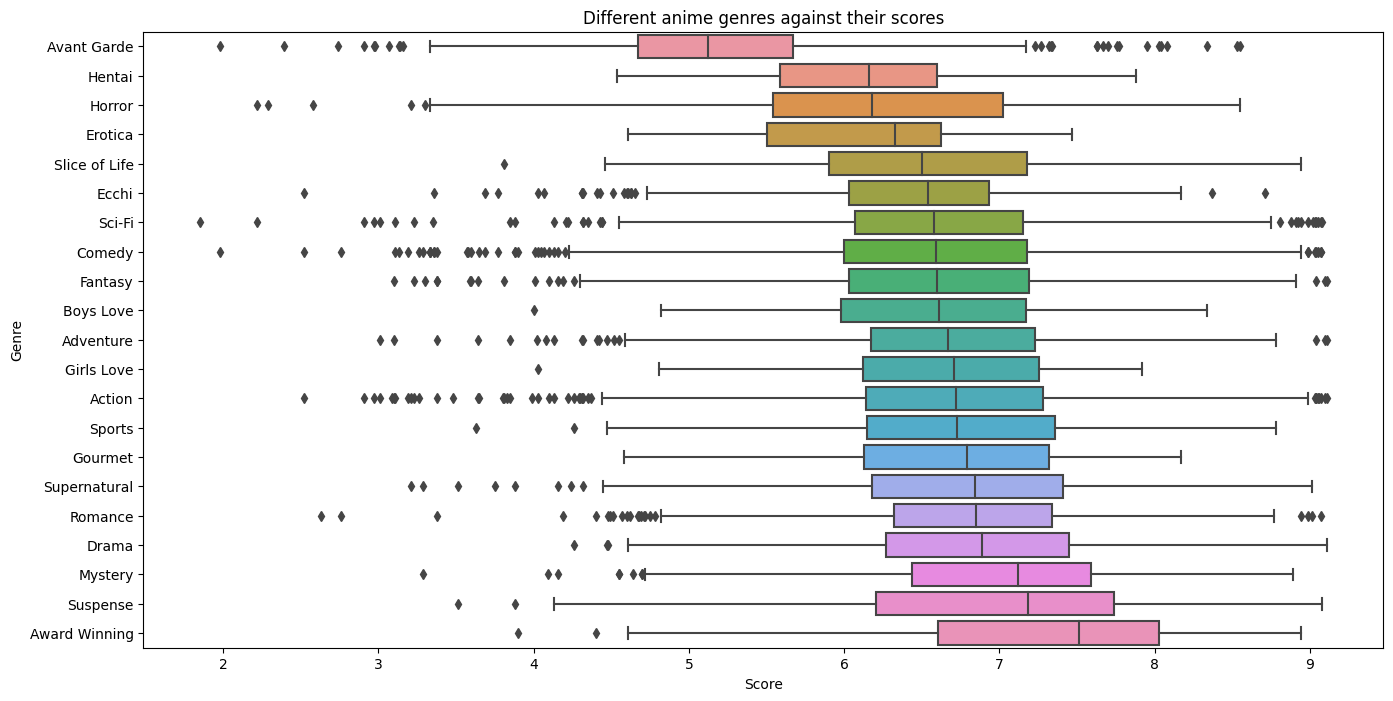

In [28]:
f, ax1 = plt.subplots(1,1,figsize=(16, 8))
a = sb.boxplot(data = gen_concat, x = 'Score', y = 'Genre', 
           order = gen_concat.groupby('Genre')['Score'].median().sort_values().index)
ax1.set(title='Different anime genres against their scores')

[Text(0.5, 1.0, 'Different anime genres against their popularity')]

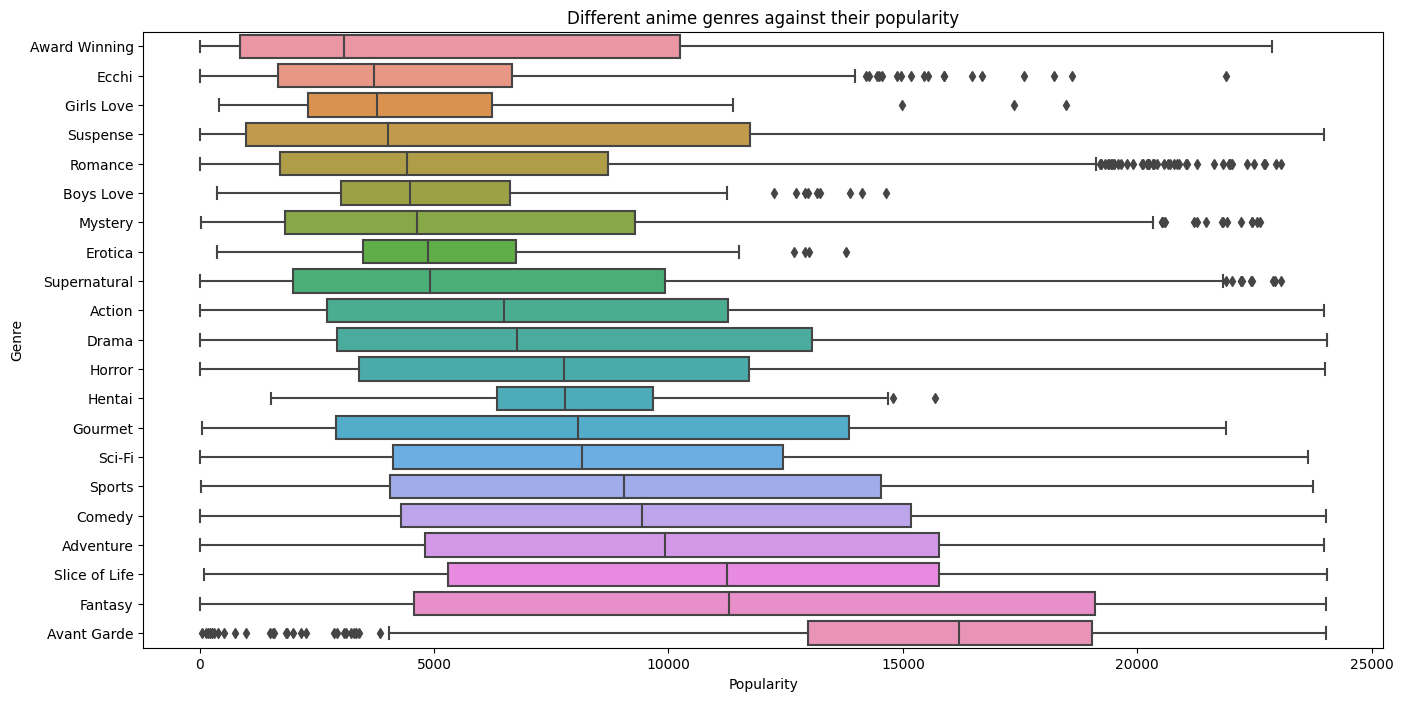

In [29]:
f, ax1 = plt.subplots(1,1,figsize=(16, 8))
a = sb.boxplot(data = gen_concat, x = 'Popularity', y = 'Genre', 
           order = gen_concat.groupby('Genre')['Popularity'].median().sort_values().index)
ax1.set(title='Different anime genres against their popularity')

#### There is very little variation between all the Genres against both Score and Popularity. It shows that generally all the different genres are of low correlation with the response variables.

***

### Analsysis of "Themes" against Score/ Popularity
#### Getting all the themes and the count for each of them.

In [30]:
# to get all the themes types and their count
themes = dict()

for i,l in enumerate(clean_ani_s["Themes"]):
    for var in set(l):
        themes[var] = themes.get(var, 0) + 1

themes = pd.DataFrame(data = themes, index = ["Count"])
themes = themes.transpose()
themes = themes.reset_index()
themes = themes.rename({"index": "Themes"}, axis=1)
themes = themes.sort_values(by=['Count'], ascending=False)
#themes = themes.loc[themes["Count"] > 10]
# reset the index
themes.index = range(len(themes))
themes

,Themes,Count
0,School,1714
1,Music,1178
2,Mecha,1153
3,Historical,1105
4,Parody,653
5,Anthropomorphic,637
6,Military,596
7,Super Power,596
8,Mythology,570
9,Space,542


#### Splitting the Animes by their Themes.

In [31]:
# spliting the dataset by themes
df_dict_themes = dict()

# for each specific theme get all anime with that genre
for i, thm in enumerate(themes["Themes"]):
    tmp = clean_ani_s.copy()
    drop_ = [x for x in range(len(tmp))]
    for j, thm_list in enumerate(clean_ani_s["Themes"]):
        if thm in thm_list:
            drop_.remove(j)
    # drop all rows without the genre
    tmp = tmp.drop(index = drop_)
    # reset the index
    tmp.index = range(len(tmp))
    # add the dataframe into a dictionary
    df_dict_themes[thm] = tmp


In [32]:
# Assign each of the respective dataframe with a tag of theme category
for i, thm in enumerate(themes["Themes"]):
    df_dict_themes[thm] = df_dict_themes[thm].assign(Theme=thm)

In [33]:
# concate all the df
for i, thm in enumerate(themes["Themes"]):
    if (i == 0):
        thm_concat = df_dict_themes[thm]
    else:
        thm_concat = pd.concat([thm_concat,df_dict_themes[thm]])

#### Plotting the different themes and their scores on a boxplot.

[Text(0.5, 1.0, 'Different anime themes against their scores')]

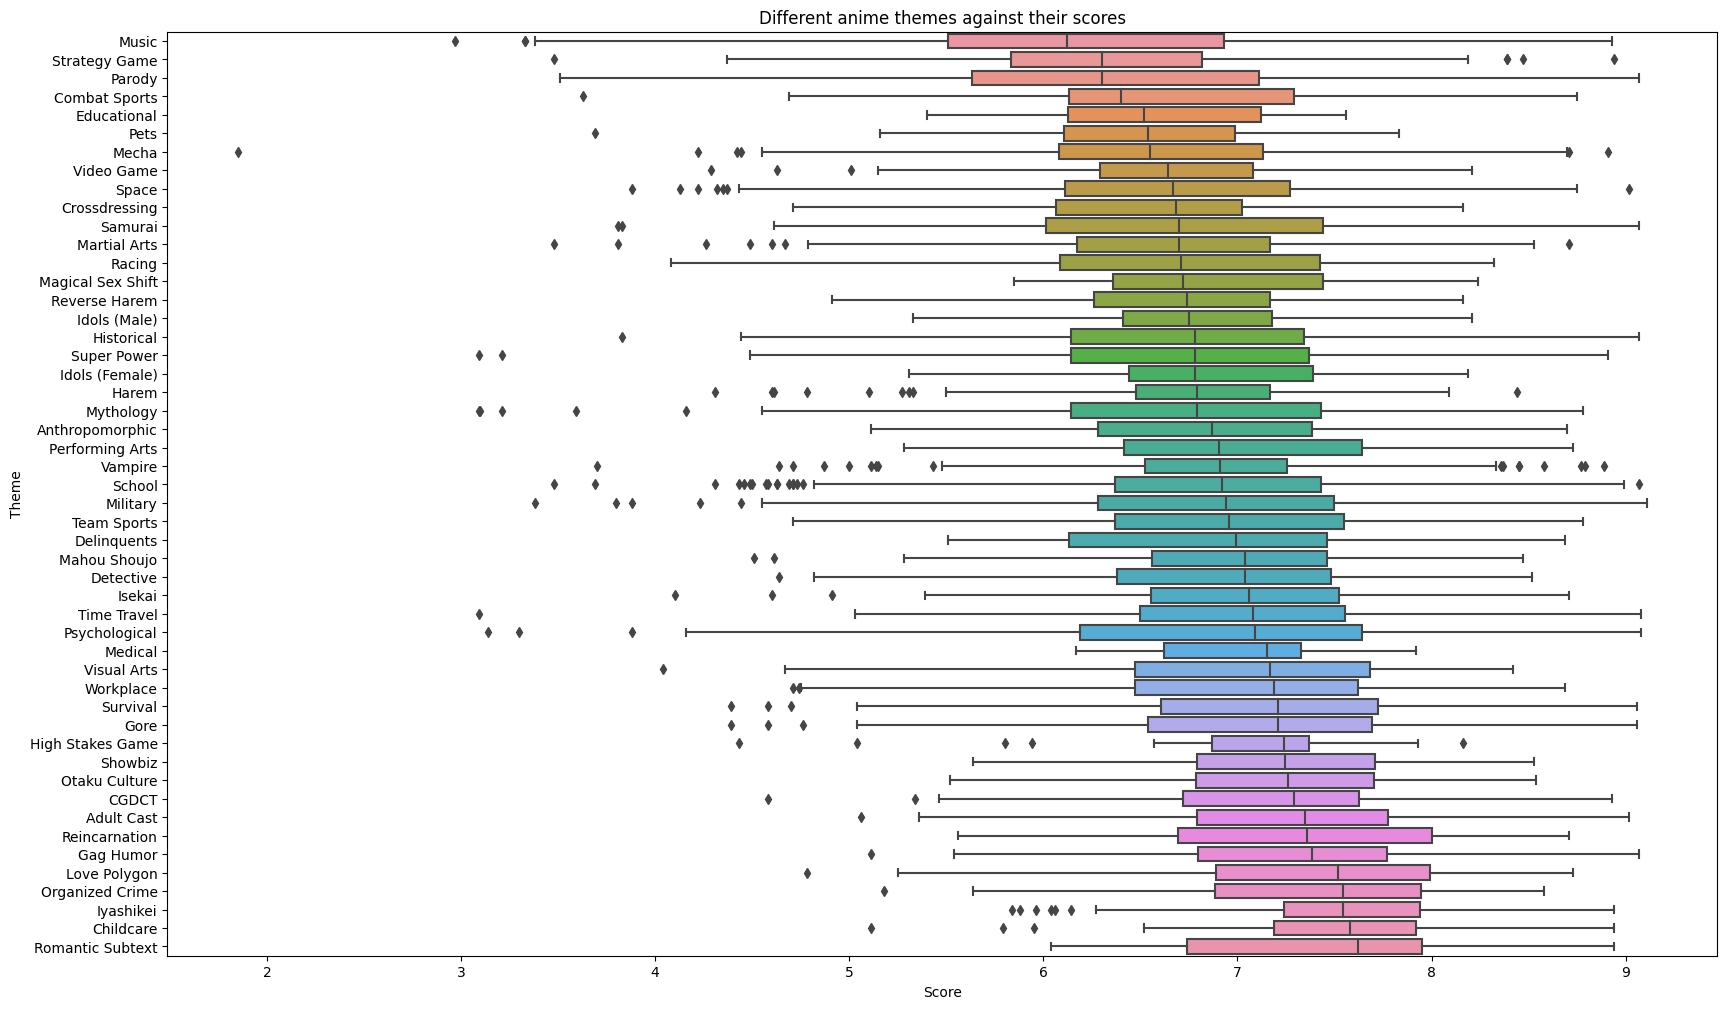

In [34]:
f, ax1 = plt.subplots(1,1,figsize=(20, 12))
a = sb.boxplot(data = thm_concat, x = 'Score', y = 'Theme', 
           order = thm_concat.groupby('Theme')['Score'].median().sort_values().index)
ax1.set(title='Different anime themes against their scores')

[Text(0.5, 1.0, 'Different anime themes against their popularity')]

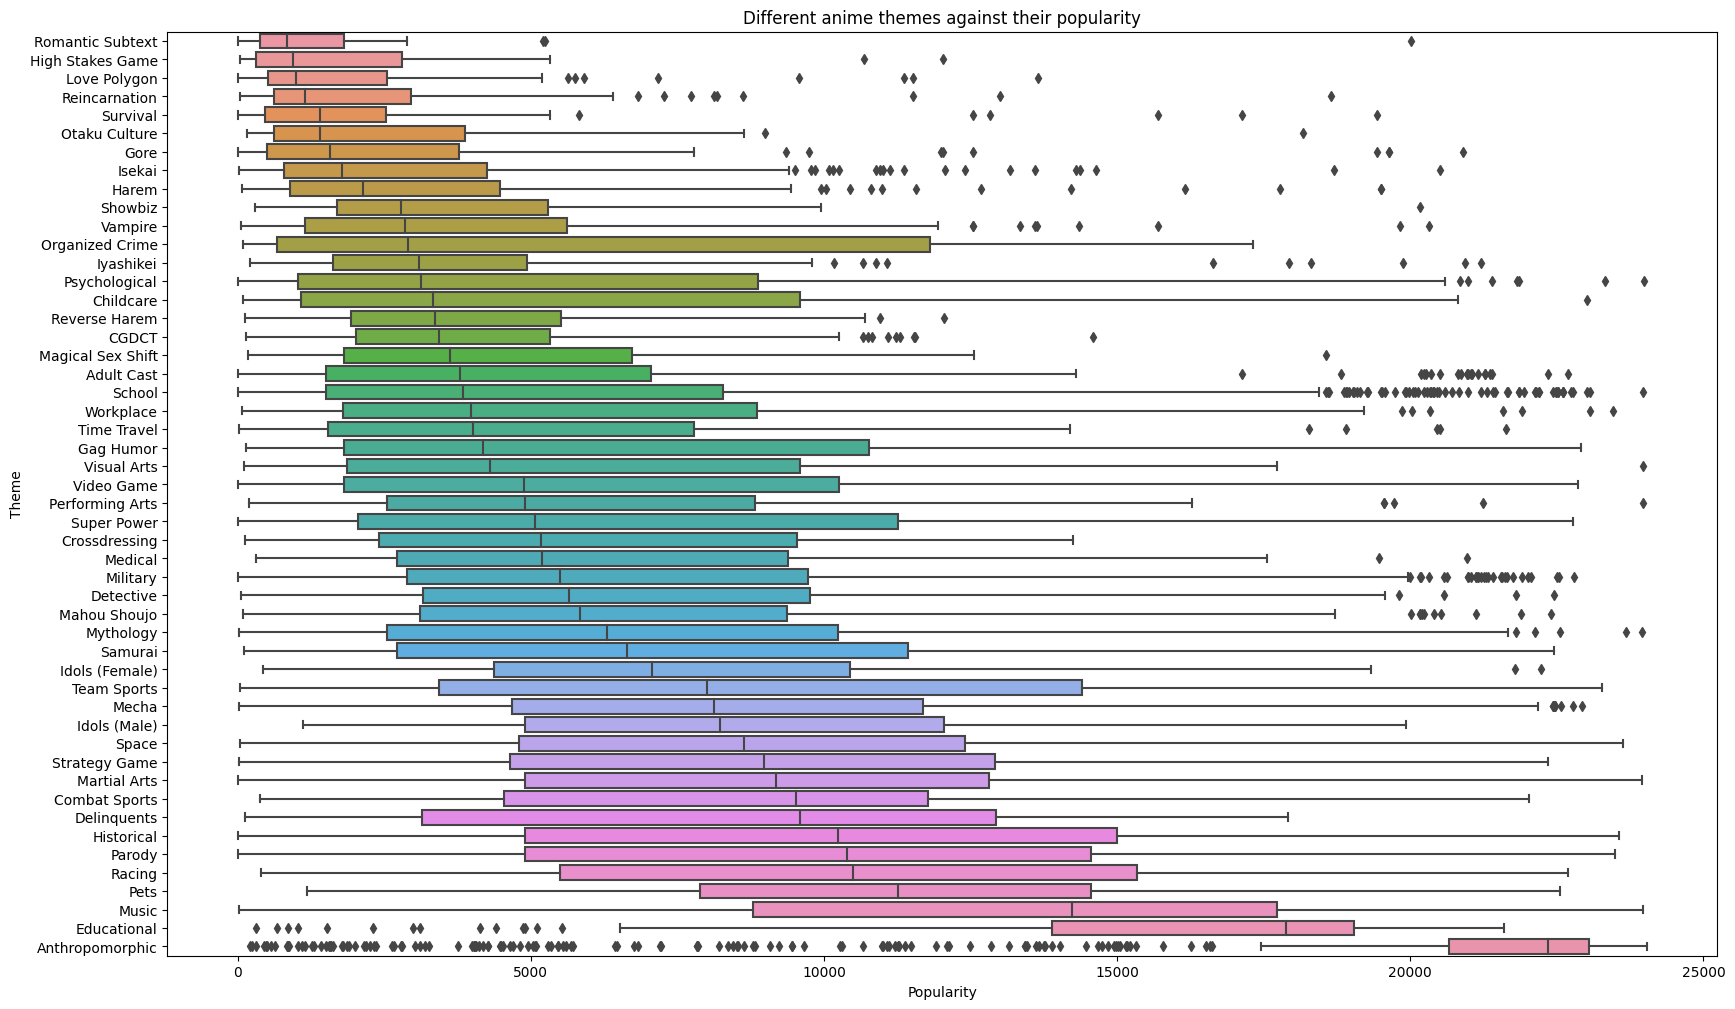

In [35]:
f, ax1 = plt.subplots(1,1,figsize=(20, 12))
a = sb.boxplot(data = thm_concat, x = 'Popularity', y = 'Theme', 
           order = thm_concat.groupby('Theme')['Popularity'].median().sort_values().index)
ax1.set(title='Different anime themes against their popularity')

#### There is little variation in the Themes against the Score for the Animes.
#### However, there is a moderate amount of variation in the Themes against Popularity, which suggest that there is a moderate to strong correlation between Themes and Popularity. Thus, Themes should be used as a predictor for Popularity.

***

### Analysis of the Number of Episodes against Score/ Popularity

#### Here, we get all the Animes Number of Episodes, Score and Popularity into a single dataframe.

In [36]:
# isolating the number of episodes and score
df_nepi = pd.DataFrame(clean_ani_s[["# Episodes", "Score", "Popularity"]])
# drop those with an unknown number of episodes
df_nepi = df_nepi.loc[df_nepi["# Episodes"] != "Unknown"]
# change they type from str to int64
df_nepi["# Episodes"] = df_nepi["# Episodes"].astype('int64')
# reset the index
df_nepi.index = range(len(df_nepi))
# check
df_nepi

,# Episodes,Score,Popularity
0,64,9.11,3
1,13,9.10,525
2,24,9.08,13
3,51,9.07,336
4,13,9.07,226
...,...,...,...
18621,2,4.61,12360
18622,1,4.61,12682
18623,2,4.59,11746
18624,1,4.59,11343


#### Here, we get the correlation heatmap of the Numnber of Episodes against Score/ Popularity.

[Text(0.5, 1.0, 'Correlation between #Episodes, Popularity and Score')]

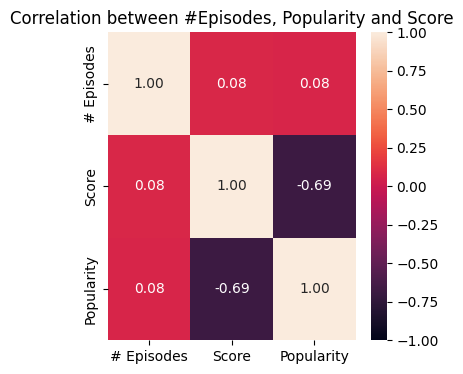

In [37]:
f, ax1 = plt.subplots(1,1,figsize=(4,4))
tmp = sb.heatmap(df_nepi.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
ax1.set(title='Correlation between #Episodes, Popularity and Score')

#### There is a low correlation of 0.08 between the Number of Episodes against the Score/ Popularity, thus the Number of Episodes should not be used as a predictor.

***

### Analysis of Demographic against Score/ Popularity

[Text(0.5, 1.0, 'Different anime demographic against their scores')]

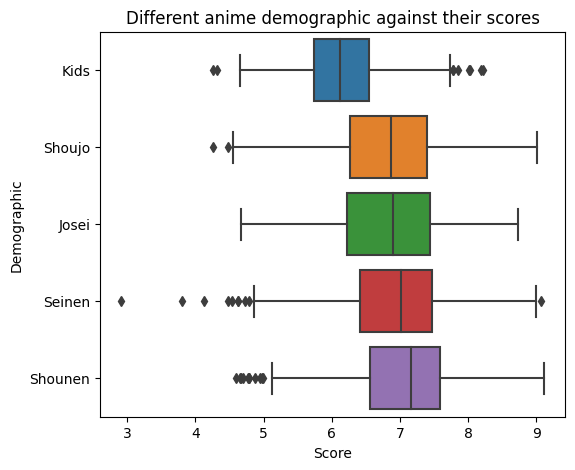

In [38]:
f, ax1 = plt.subplots(1,1,figsize=(6, 5))
a = sb.boxplot(data = clean_ani_s, x = 'Score', y = 'Demographic', 
           order = clean_ani_s.groupby('Demographic')['Score'].median().sort_values().index)
ax1.set(title='Different anime demographic against their scores')

[Text(0.5, 1.0, 'Different anime demographic against their Popularity')]

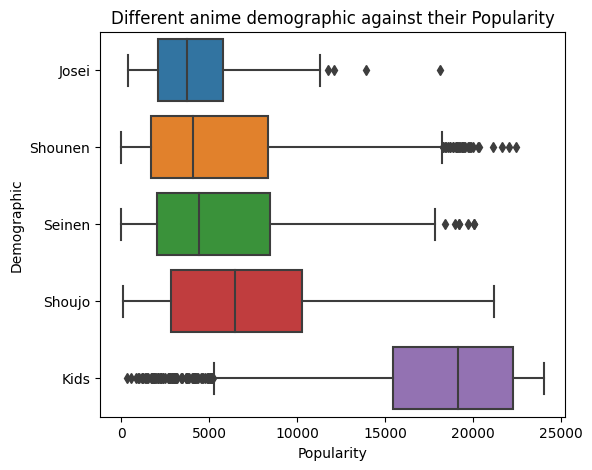

In [39]:
f, ax1 = plt.subplots(1,1,figsize=(6, 5))
a = sb.boxplot(data = clean_ani_s, x = 'Popularity', y = 'Demographic', 
           order = clean_ani_s.groupby('Demographic')['Popularity'].median().sort_values().index)
ax1.set(title='Different anime demographic against their Popularity')

#### From the boxplots, as Q3 of the kids demographic is lower than the median of all demographics, we can conclude that Animes targetted towards kids will have a low Score. 
#### The entire Q1 to Q3 for kids is significantly higher than all other categories when plot against Popularity, which shows that Animes targetted towards kids are very unpopular and disliked. (The lower the Popularity the better)
#### Thus, Demographic is important as a predictor for Popularity.

***

### Analysis of Age Ratings against the Score/ Popularity

[Text(0.5, 1.0, 'Different anime Age Rating against their scores')]

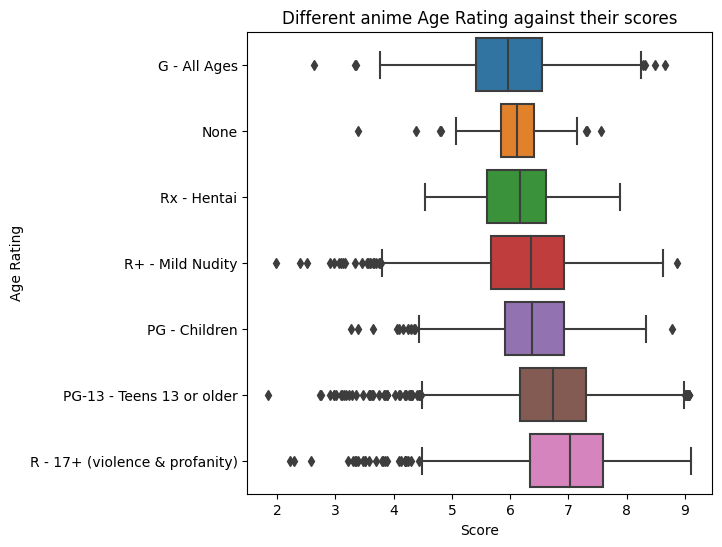

In [40]:
f, ax1 = plt.subplots(1,1,figsize=(6, 6))
a = sb.boxplot(data = clean_ani_s, x = 'Score', y = 'Age Rating', 
           order = clean_ani_s.groupby('Age Rating')['Score'].median().sort_values().index)
ax1.set(title='Different anime Age Rating against their scores')

#### The Age Rating against the Score has very little variation, the correlation should be low hence it should not be used to predict score.

[Text(0.5, 1.0, 'Different anime Age Rating against their Popularity')]

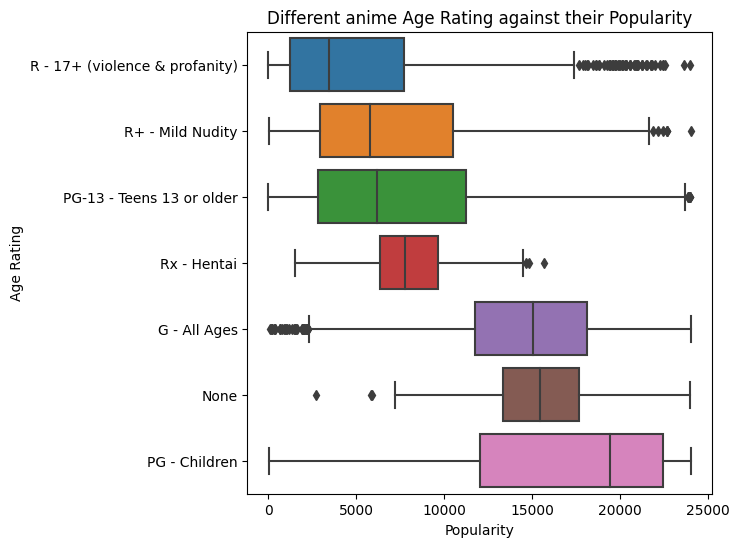

In [41]:
f, ax1 = plt.subplots(1,1,figsize=(6, 6))
a = sb.boxplot(data = clean_ani_s, x = 'Popularity', y = 'Age Rating', 
           order = clean_ani_s.groupby('Age Rating')['Popularity'].median().sort_values().index)
ax1.set(title='Different anime Age Rating against their Popularity')

#### Age Rating against Popularity has much more variation, furthermore, the first 4 categories have their Q3 lower than the Q1 of the rest of the categories, suggesting there is a moderate to strong correlation, thus could be used as a predictor for Popularity. 
#### Earlier, demographic was shown to be a possible predictor. Age Rating and Demographic are of a very similar nature as both show the target age group. Therefore, as Age Rating shows a greater correlation Age Rating should be used instead of demographic.

***

## Analysing released date of the Anime and its score

In [42]:
df_period = clean_ani_s.copy()
sea_list = []
year_list = []

for i, period in enumerate(df_period["Premiered"]):
    if (type(period) == str):
        sea = ''.join(x for x in period if x.isalpha())
        year = ''.join(x for x in period if x.isdigit())
        sea = np.nan if (sea == '') else sea
        year = np.nan if (year == '') else int(year)
        sea_list.append(sea)
        year_list.append(year)
    else:
        sea_list.append(np.nan)
        year_list.append(np.nan)

# insert tags for each type
df_period["Season"] = sea_list
df_period["Year"] = year_list

[Text(0.5, 1.0, 'Year anime was released against their scores')]

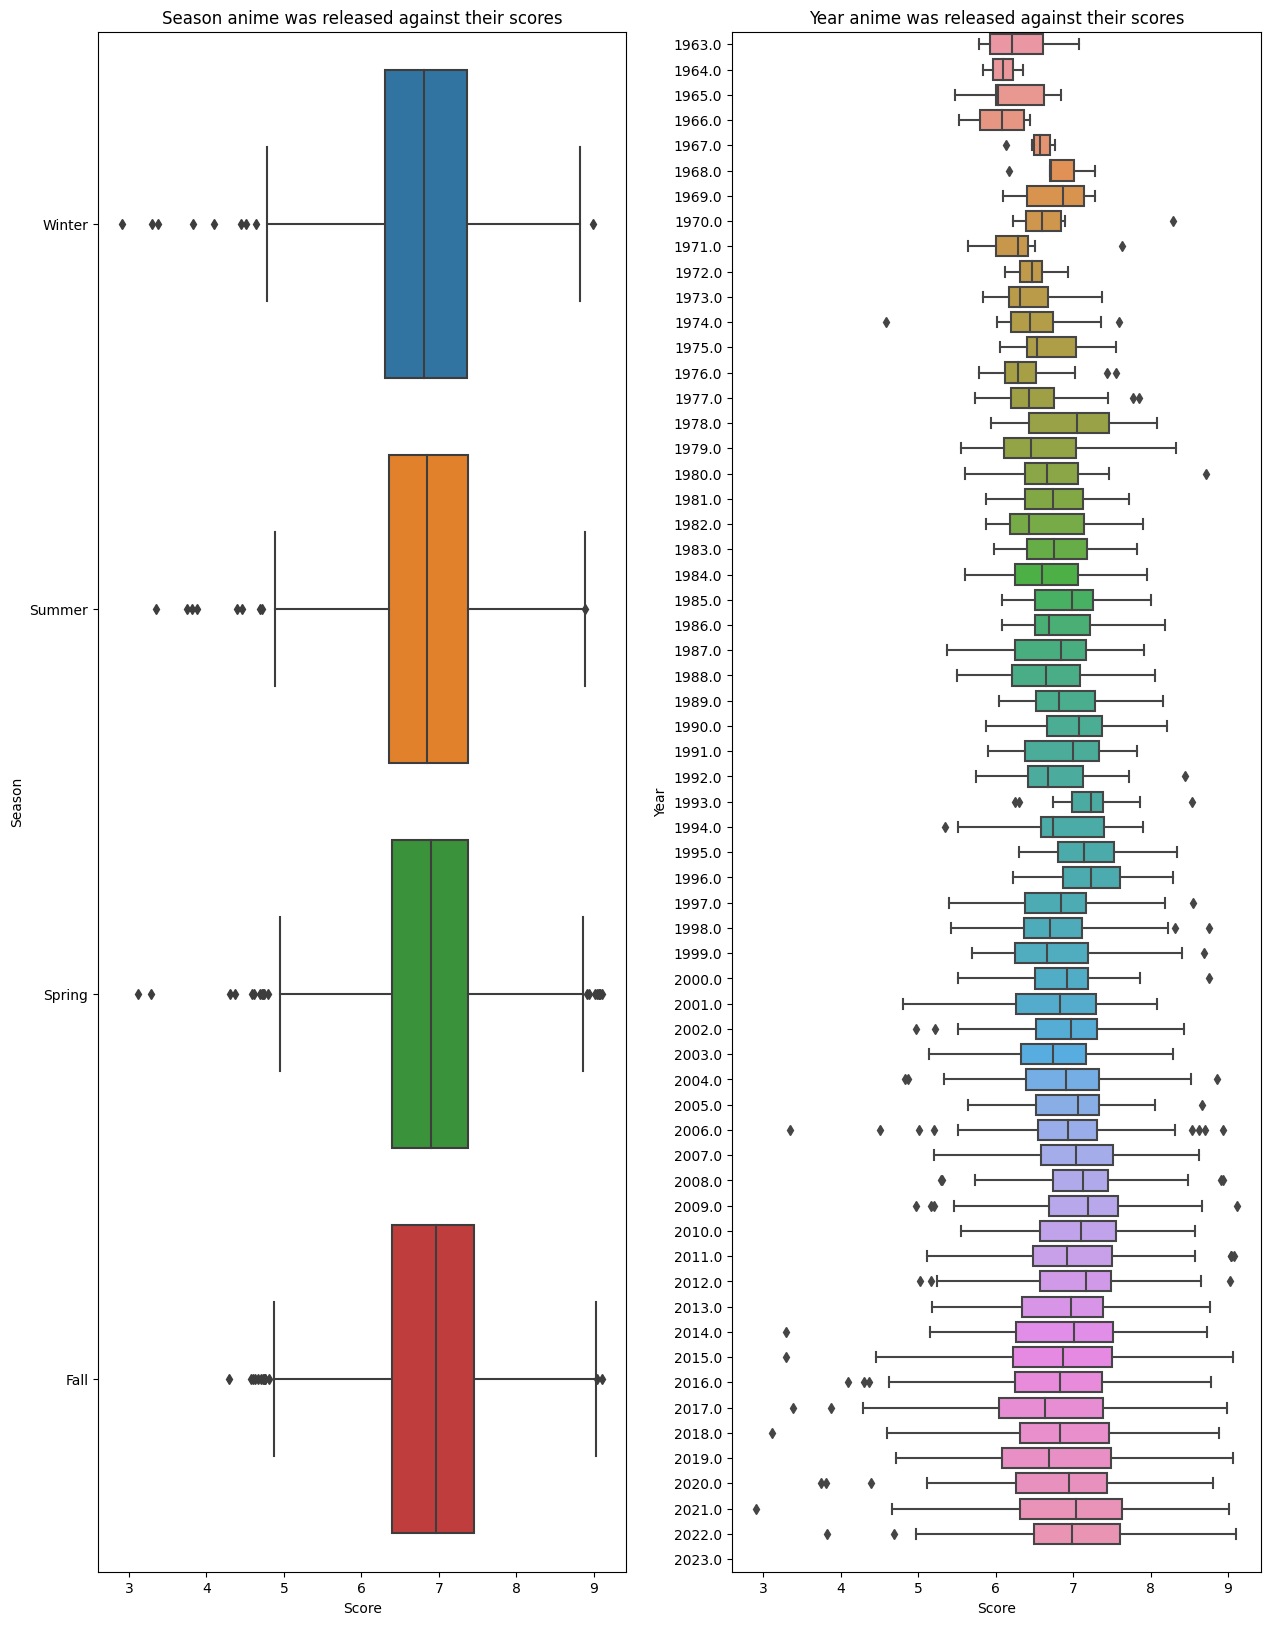

In [43]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 20))

a = sb.boxplot(data = df_period, x = 'Score', y = 'Season', 
           order = df_period.groupby('Season')['Score'].median().sort_values().index, ax=ax1)
ax1.set(title='Season anime was released against their scores')

b = sb.boxplot(data = df_period, x = 'Score', y = 'Year', orient = "h", ax=ax2)
ax2.set(title='Year anime was released against their scores')

#### There is very little variation between seasons and years against the score, there is low correlation between these predictors and score


[Text(0.5, 1.0, 'Year anime was released against their popularity')]

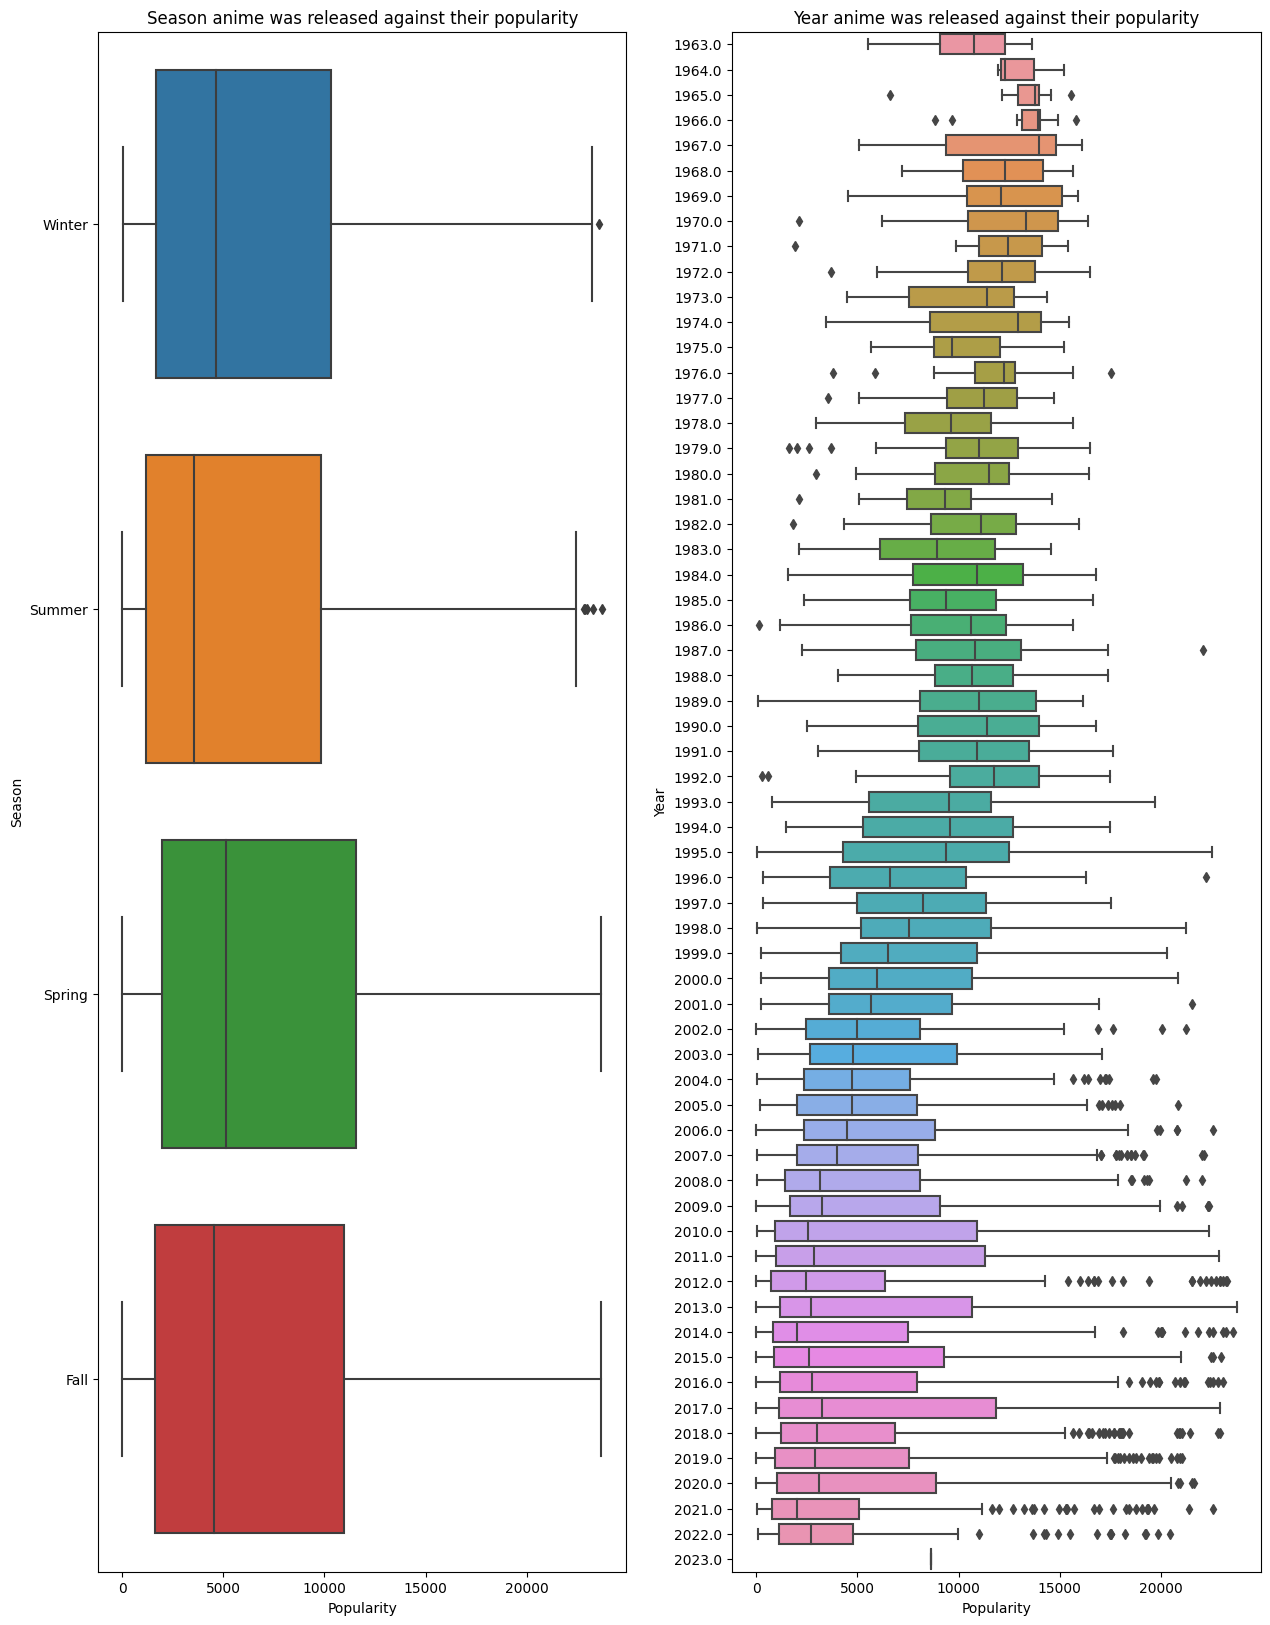

In [44]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 20))

a = sb.boxplot(data = df_period, x = 'Popularity', y = 'Season', 
           order = df_period.groupby('Season')['Score'].median().sort_values().index, ax=ax1)
ax1.set(title='Season anime was released against their popularity')

b = sb.boxplot(data = df_period, x = 'Popularity', y = 'Year', orient = "h", ax=ax2)
ax2.set(title='Year anime was released against their popularity')

#### There is a moderate amount of variation between the Year Released and the Popularity, with the Popularity trending lower (which is better) as the year of release is more recent. Suggesting that newer Animes are more popular.

[Text(0.5, 1.0, 'Correlation between Year Released and Score')]

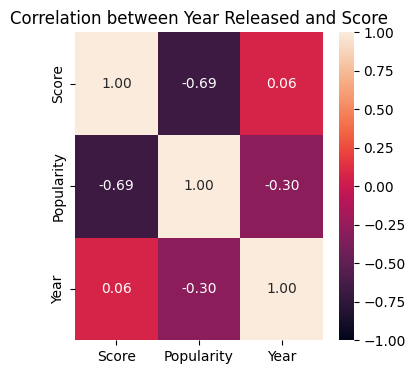

In [45]:
tmp = df_period[["Score","Popularity", "Year"]]

f, ax1 = plt.subplots(1,1,figsize=(4,4))
tmp = sb.heatmap(tmp.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
ax1.set(title='Correlation between Year Released and Score')

#### However, the correlation between the Year Released against Score/ Popularity is still low at 0.06, thus should not be used as a predictor. 

***

### Analysis of having a sequel with score/popularity

In [46]:
# Spliting into those with a sequel and those without
df_yseq = clean_ani_s.loc[~clean_ani_s["Sequel"].isna()]
df_nseq = clean_ani_s.loc[clean_ani_s["Sequel"].isna()]
df_yseq = df_yseq.assign(Seq=True)
df_nseq = df_nseq.assign(Seq=False)

# concat into 1 df
df_ynseq = pd.concat([df_yseq,df_nseq])

[Text(0.5, 1.0, 'Whether anime has sequel against their Score')]

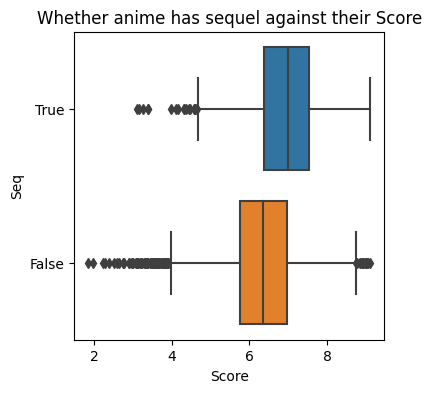

In [47]:
f, ax1 = plt.subplots(1,1,figsize=(4, 4))
a = sb.boxplot(data = df_ynseq, x = 'Score', y = 'Seq', orient = 'h', order = [True, False])
ax1.set(title='Whether anime has sequel against their Score')

#### From the boxplot it can be seen that the Q1 of the Animes' with a sequel against their Score is greater than the Animes' witout a sequel. It shows that having a sequel has a correlation to the Score.

[Text(0.5, 1.0, 'Whether anime has sequel against their Popularity')]

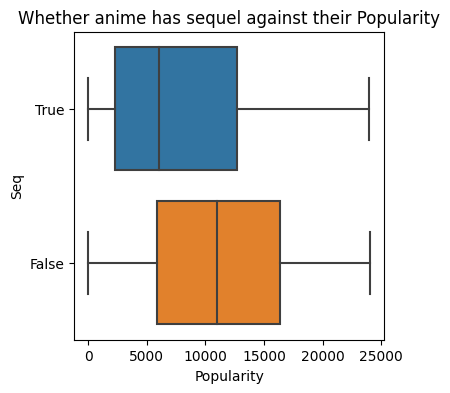

In [48]:
f, ax1 = plt.subplots(1,1,figsize=(4, 4))
a = sb.boxplot(data = df_ynseq, x = 'Popularity', y = 'Seq', orient = 'h', order = [True, False])
ax1.set(title='Whether anime has sequel against their Popularity')

#### Similarly, the Q1 of the Animes' without a sequel is at the median of those with a sequel, it shows that Animes' with a sequel has a correlation with the Popularity.

[Text(0.5, 1.0, 'Correlation between Having a sequel and Score/popularity')]

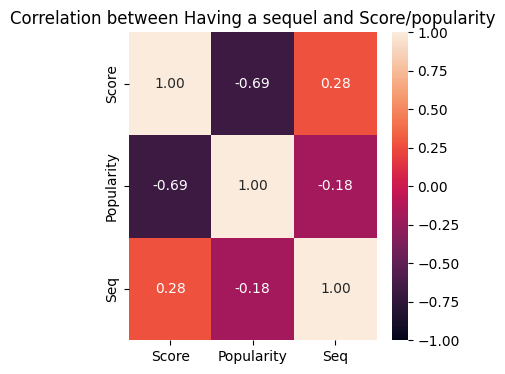

In [49]:
tmp = df_ynseq[["Score","Popularity", "Seq"]]

f, ax1 = plt.subplots(1,1,figsize=(4,4))
tmp = sb.heatmap(tmp.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
ax1.set(title='Correlation between Having a sequel and Score/popularity')

#### Despite that, the correlation between having a sequel against Score/ Popularity has been calculated to be low, and should not be used as a predictor.

#### Furthermore, the anime's score and popularity affects its probability to have a sequel. The popularity and score of an anime might contribute to it having a sequel and not the converse. Production companies will only release a sequel of an anime if it can earn them money, and that depends on the popularity of the Anime.

***

### Analysis of "Source" against Score/ Popularity

In [50]:
# remove those with unknown sources
tmp = clean_ani_s.loc[clean_ani_s["Source"] != "Unknown"]

#### Here, we plot the boxplot of the Anime Source against Score/ Popularity.

[Text(0.5, 1.0, 'Anime Source against their Score')]

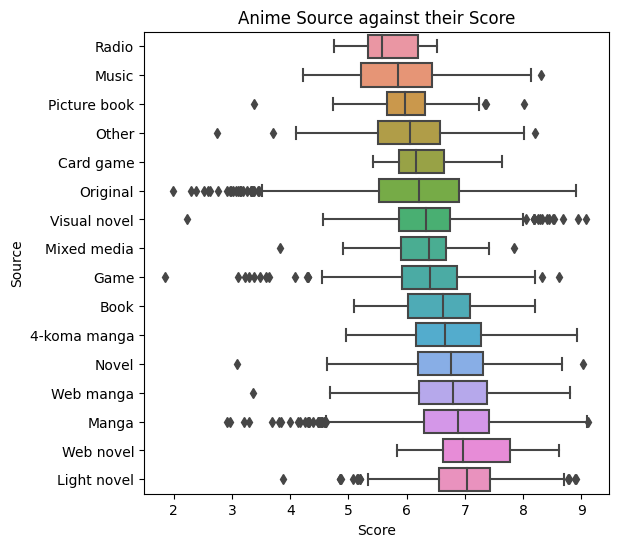

In [51]:
f, ax1 = plt.subplots(1,1,figsize=(6, 6))
a = sb.boxplot(data = tmp, x = 'Score', y = 'Source', orient = 'h',
               order = tmp.groupby('Source')['Score'].median().sort_values().index)
ax1.set(title='Anime Source against their Score')

[Text(0.5, 1.0, 'Anime Source against their Popularity')]

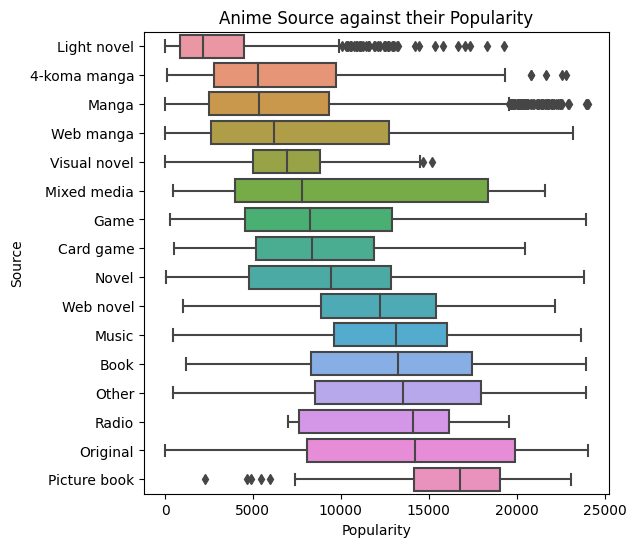

In [52]:
f, ax1 = plt.subplots(1,1,figsize=(6, 6))
a = sb.boxplot(data = tmp, x = 'Popularity', y = 'Source', orient = 'h',
               order = tmp.groupby('Source')['Popularity'].median().sort_values().index)
ax1.set(title='Anime Source against their Popularity')

#### From the boxplots we can see that there is little variation between the Anime Source and Popularity, but more so for Popularity. There is likely some correlation between Source and Popularity, however, it is likely to be of low correlation.

***

### Analysis of Anime Characters Rank against Score/ Popularity

#### This is to get the Ranking of all the characters for every anime in a List format from the Anime Traits Dataset, based on where in the list the Character is in the "Characters" column.

#### NOTE: This takes about 15 mins to run

In [53]:
tmp_list = []

for i, list_ in enumerate(clean_ani_s["Characters"]):
    # this holds the ranks of chars per anime
    tmp = []
    for j, name in enumerate(list_):
        tmp_ = clean_ani_t.loc[clean_ani_t["Names"] == name]
        tmp_.index = range(len(tmp_))
        found = False
        if (tmp_.shape[0] == 1):
            tmp.append(int(tmp_["Id"]))
            found = True
        elif (tmp_.shape[0] > 1):
            for k, ani in enumerate(tmp_["Anime"]):
                if (clean_ani_s["Adaptation"][i] in ani):
                    tmp.append(int(tmp_["Id"][k]))
                    found = True
                    break
        else:
            tmp.append(-1)
            
    if (~found):
        tmp.append(-1)
        
    tmp_list.append(tmp)
clean_ani_s["Char Ranks"] = tmp_list

#### In this cell, the Main Character(s) and Supporting Character(s) average Rank are calculated an placed into a new column. The Highest Rank of the Main and Supporting characters are also noted and placed in new columns.

In [54]:
INT_MAX = 99999
tmp_avg = []
tmp_main_avg = []
tmp_main_top = []
tmp_sup_avg = []
tmp_sup_top = []

for i, list_ in enumerate(clean_ani_s["Char Ranks"]):
    role = clean_ani_s["Role"][i]
    rk_m = []
    rk_s = []
    for j, rank in enumerate(list_):
        if (rank == -1):
            continue
        else:
            try:
                if (role[j] == "main"):
                    rk_m.append(rank)
                elif (role[j] == "supporting"):
                    rk_s.append(rank)
            except:
                continue
    
    # get the avg and top of the main
    if (len(rk_m) > 0):
        tmp_main_avg.append((sum(rk_m) / len(rk_m)))
        tmp_main_top.append(max(rk_m))
    else:
        tmp_main_avg.append(np.nan)
        tmp_main_top.append(np.nan)
        
    # get the avg and top of the supporting
    if (len(rk_s) > 0):
        tmp_sup_avg.append((sum(rk_s) / len(rk_s)))
        tmp_sup_top.append(max(rk_s))
    else:
        tmp_sup_avg.append(np.nan)
        tmp_sup_top.append(np.nan)
    
    # get the avg of the main and supporting
    tmp = rk_m + rk_s
    if (len(tmp) > 0):
        tmp_avg.append(sum(tmp) / len(tmp))
    else:
        tmp_avg.append(np.nan)

clean_ani_s["Main_avg"] = tmp_main_avg # The average rank of main character(s) for each anime
clean_ani_s["Main_top"] = tmp_main_top # The highest rank among the main character(s) for each anime
clean_ani_s["Supp_avg"] = tmp_sup_avg  # The average rank of supporting character(s) for each anime
clean_ani_s["Supp_top"] = tmp_sup_top  # The highest rank among the supporting character(s) for each anime
clean_ani_s["Char_avg"] = tmp_avg      # The average of rank of all characters for each anime

#### In this cell we calculate the correlation of the categories from above against Score/ Popularity.

[Text(0.5, 1.0, 'Correlation between the character ranks against score/popularity')]

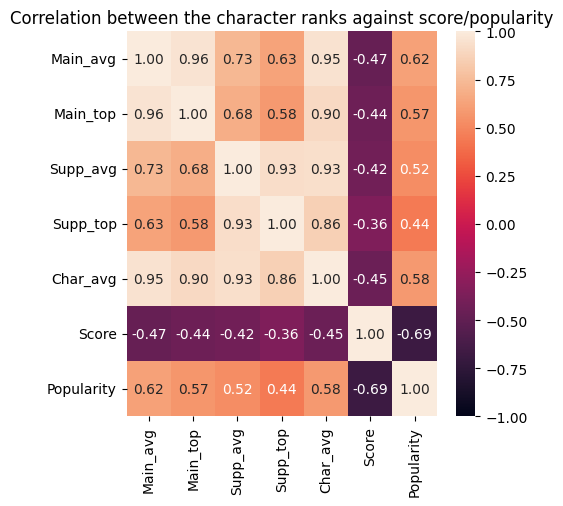

In [55]:
tmp = clean_ani_s[["Main_avg","Main_top", "Supp_avg", "Supp_top", "Char_avg", "Score", "Popularity"]]
f, ax1 = plt.subplots(1,1,figsize=(5,5))
tmp = sb.heatmap(tmp.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
ax1.set(title='Correlation between the character ranks against score/popularity')

#### The 2 highest correlations are Main Chararcter Average Rank against Popularity, and the Character Average Rank against Popularity, and the correlation is moderately high at above 0.5, thus should be used as a predictor.
#### Furthermore, the correlations to these categories are all about 0.5, this suggests that the Characters contribute a significant portion to the Animes overall Popularity. In which people watch the Animes' because of the characters.

***

### Analysis of Voice Actor's against Score/ Popularity

#### In this cell we get all the Voice Actors and the number of Animes they voice acted in.

In [56]:
voice = dict()
anime_titles = dict()

for i, l in enumerate(clean_ani_s["Voice Actors"]):
    for var in set(l):
        if var != "":
            voice[var] = voice.get(var, 0) + 1
            if var in anime_titles:
                anime_titles[var].append(clean_ani_s["Title"][i])
            else:
                anime_titles[var] = [clean_ani_s["Title"][i]]

voice = pd.DataFrame(data=voice, index=["Count"]).transpose()
voice = voice.reset_index().rename({"index": "Voice Actor"}, axis=1)
voice = voice.sort_values(by=["Count"], ascending=False).reset_index(drop=True)

# filter out the first row with empty list
voice = voice[voice["Voice Actor"] != "[]"]

# add anime titles to the voice dataframe
voice["Anime Titles"] = voice["Voice Actor"].apply(lambda x: anime_titles[x])

voice

,Voice Actor,Count,Anime Titles
1,sakurai takahiro,412,"[Fruits Basket: The Final, 3-gatsu no Lion 2nd..."
2,hanazawa kana,385,"[Steins;Gate, 3-gatsu no Lion 2nd Season, Owar..."
3,sawashiro miyuki,345,"[Hunter x Hunter (2011), Owarimonogatari 2nd S..."
4,koyasu takehito,342,"[Gintama°, Kaguya-sama wa Kokurasetai: Ultra R..."
5,kugimiya rie,338,"[Fullmetal Alchemist: Brotherhood, Gintama°, G..."
...,...,...,...
4717,sanada hiroyuki,1,[Kamui no Ken]
4718,tamomura shin,1,[Gilgamesh]
4719,wada kei,1,[Esper Mami]
4720,arai kazuo,1,[Lupin III]


#### Here, we get the Average Score/ Popularity of the Animes they voice acted in, along with the highest Score/ Popularity of an Anime they voiced in.

In [57]:
voice_df = clean_ani_s["Voice Actors"]
Actor_Total_Pop = {}

# associated the anime index in the dataframe to the actor
for x, title in enumerate(clean_ani_s["Title"]):
    for actor in clean_ani_s["Voice Actors"][x]:
        if (actor == "[]"):
            continue
        elif actor not in Actor_Total_Pop:
            Actor_Total_Pop[actor] = [x]
        else:
            Actor_Total_Pop[actor].append(x)


tmp = []
index = 0
for actor, pop_indices in Actor_Total_Pop.items():
    pop_indices = sorted(pop_indices, key=lambda i: clean_ani_s["Popularity"][i])
    tmp_ = [clean_ani_s["Popularity"][i] for i in pop_indices if ~np.isnan(clean_ani_s["Popularity"][i])]
    avg_pop = sum(tmp_) / len(tmp_)
    top_pop = tmp_[0]

    score_indices = sorted(pop_indices, key=lambda i: clean_ani_s["Score"][i], reverse=True)
    tmp_ = [clean_ani_s["Score"][i] for i in score_indices if ~np.isnan(clean_ani_s["Score"][i])]
    if (len(tmp_) > 0):
        avg_score = sum(tmp_) / len(tmp_)
        top_score = tmp_[0]
    else:
        avg_score = np.nan
        top_score = np.nan

    anime_titles = [clean_ani_s["Title"][i] for i in pop_indices]
    if len(anime_titles) > 0 and avg_pop is not None and avg_score is not None:
        if actor not in [d["Voice Actor"] for d in tmp]:
            tmp.append({"Index":index,"Voice Actor": actor, "Animes' Average Popularity": avg_pop, 
                        "Animes' Top Popularity": top_pop, "Animes' Average Score": avg_score, 
                        "Animes' Top Score": top_score, "Anime Titles": anime_titles, 
                        "# of Animes'": len(pop_indices)})
    index += 1
df11 = pd.DataFrame(tmp)

#### Here we sort and rank the Voice Actors based on the Animes Average Score and Popularity.

In [58]:
#Sort the data based on Animes' Average Score
df11 = df11.sort_values("Animes' Average Score",ascending= False)
voice_actor_df = df11.reset_index(drop=True)


# Add a new column with the Voice Actor rank based their voiced "Animes' Average Popularity"
voice_actor_df['Voice_Actor_Rank_Score'] = voice_actor_df["Animes' Average Score"].rank(method='dense', ascending=False)
voice_actor_df['Voice_Actor_Rank_Pop'] = voice_actor_df["Animes' Average Popularity"].rank(method='dense', ascending=True)

# reset index
voice_actor_df = voice_actor_df.reset_index(drop=True)

# Display the dataframe
voice_actor_df

,Index,Voice Actor,Animes' Average Popularity,Animes' Top Popularity,Animes' Average Score,Animes' Top Score,Anime Titles,# of Animes',Voice_Actor_Rank_Score,Voice_Actor_Rank_Pop
0,96,kamata erena,19.0,19,8.94,8.94,[Koe no Katachi],1,1.0,1.0
1,187,kobashi megumi,864.0,864,8.73,8.73,[Mushishi Zoku Shou 2nd Season],1,2.0,112.0
2,221,miyamura yoshito,2957.0,2957,8.71,8.71,[Ashita no Joe 2],1,3.0,732.0
3,219,tanaka emi,2957.0,2957,8.71,8.71,[Ashita no Joe 2],1,3.0,732.0
4,223,daruma jiro,2957.0,2957,8.71,8.71,[Ashita no Joe 2],1,3.0,732.0
...,...,...,...,...,...,...,...,...,...,...
4716,4534,satou eri,14302.0,14302,NaN,NaN,[Wagahai wa Neko de Aru],1,NaN,3928.0
4717,4535,mononobe alice,11205.0,11205,NaN,NaN,[Watanuki-san Chi to],1,NaN,3726.0
4718,4536,oozora subaru,11205.0,11205,NaN,NaN,[Watanuki-san Chi to],1,NaN,3726.0
4719,4537,natsuiro matsuri,11205.0,11205,NaN,NaN,[Watanuki-san Chi to],1,NaN,3726.0


#### Here we create a correlation heatmap for the Voice Actor Ranks against Score/ Popularity.

[Text(0.5, 1.0, "Correlation between the Voice Actor's Rank and Animes' Average Score/Popularity")]

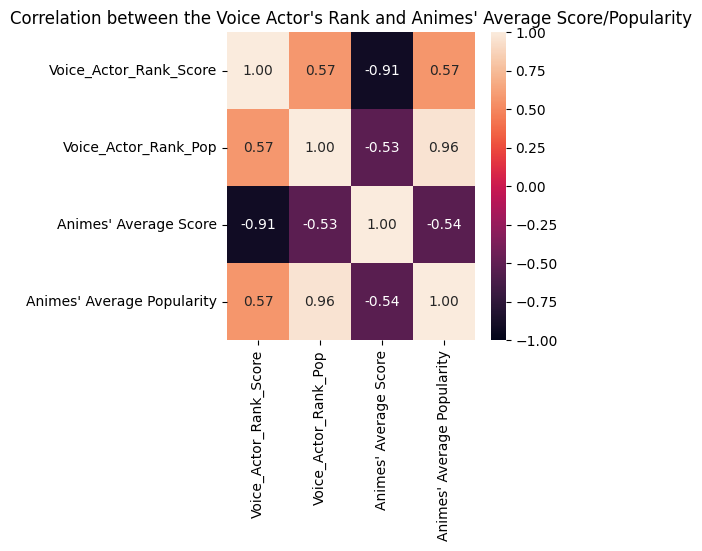

In [59]:
tmp = voice_actor_df[["Voice_Actor_Rank_Score", 'Voice_Actor_Rank_Pop', "Animes' Average Score", "Animes' Average Popularity"]]
f, ax1 = plt.subplots(1,1,figsize=(4,4))
tmp = sb.heatmap(tmp.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
ax1.set(title="Correlation between the Voice Actor's Rank and Animes' Average Score/Popularity")

#### From this heatmap, we can see that the voice actors rank based upon their Animes average score had a very strong correlation of 0.91. the voice actors rank based upon their Animes average popularity also had a very strong correlation of 0.97. 
#### Therefore, it can be concluded that the Voice Actor has a high correlation with the Animes' Score and Popularity, and thus voice actor rank should be used as a predictor.

***

### Analysis of Studio against Score/ Popularity

#### This cell is to remove all the NaN values.

In [60]:
# filter rows with "None found, add some" in the "Studios" column
tmp_studio_eda = clean_ani_s.copy()

#Drop rows with missing values in the specified columns
tmp_studio_eda = tmp_studio_eda.loc[~tmp_studio_eda["Popularity"].isna()]
tmp_studio_eda = tmp_studio_eda.loc[~tmp_studio_eda["Score"].isna()]

# Reset the index of the DataFrame
tmp_studio_eda.index = range(len(tmp_studio_eda))

#### This cell is to get all the Studios and the number of Anime(s) the Studio made.

In [61]:
# All studios and their animes
studio = dict()
anime_titles = dict()

for i, lis in enumerate(tmp_studio_eda["Studios"]):
    if (lis != []):
        for var in lis:
            studio[var] = studio.get(var, 0) + 1
            if var in anime_titles:
                anime_titles[var].append(clean_ani_s["Title"][i])
            else:
                anime_titles[var] = [clean_ani_s["Title"][i]]

studio = pd.DataFrame(data=studio, index=["Count"]).transpose()
studio = studio.reset_index().rename({"index": "Studios"}, axis=1)
studio = studio.sort_values(by=["Count"], ascending=False).reset_index(drop=True)


#add anime titles to the studio dataframe
studio["Anime Titles"] = studio["Studios"].apply(lambda x: anime_titles[x])

studio

,Studios,Count,Anime Titles
0,Toei Animation,672,"[Slam Dunk, Mononoke, World Trigger 3rd Season..."
1,Sunrise,473,"[Gintama', Gintama': Enchousen, Gintama, Ginta..."
2,J.C.Staff,368,"[Bakuman. 3rd Season, Kono Subarashii Sekai ni..."
3,Madhouse,349,"[Hunter x Hunter (2011), Monster, Hajime no Ip..."
4,Production I.G,311,[Haikyuu!! Karasuno Koukou vs. Shiratorizawa G...
...,...,...,...
841,Digital Network Animation,1,[Kimi wa Kanata]
842,Ripromo,1,[Tokyo Futago Athletic]
843,Studio UGOKI,1,[Robber's Company]
844,I-move,1,[Pia Carrot e Youkoso!!: Sayaka no Koi Monogat...


#### This cell calculates for each Studio the Average Anime Score/ Popularity, as well as the highest Score/ Popularity.

In [62]:
#Only include the studio that have produced at least the average number of anime across all studios
studio_Total_Pop = dict()

for x, lis in enumerate(tmp_studio_eda["Studios"]):
    if (lis == []):
        continue
    for std in lis:
        if std not in studio_Total_Pop:
            studio_Total_Pop[std] = [x]  
        else:
            studio_Total_Pop[std].append(x)

            
tmp = []
for std, pop_indices in studio_Total_Pop.items():
    pop_indices = sorted(pop_indices, key=lambda i: clean_ani_s["Popularity"][i])
    tmp_ = [clean_ani_s["Popularity"][i] for i in pop_indices if ~np.isnan(clean_ani_s["Popularity"][i])]
    avg_pop = sum(tmp_) / len(tmp_)
    top_pop = tmp_[0]

    score_indices = sorted(pop_indices, key=lambda i: clean_ani_s["Score"][i], reverse=True)
    tmp_ = [clean_ani_s["Score"][i] for i in score_indices if ~np.isnan(clean_ani_s["Score"][i])]
    if (len(tmp_) > 0):
        avg_score = sum(tmp_) / len(tmp_)
        top_score = tmp_[0]
    else:
        avg_score = np.nan
        top_score = np.nan

    anime_titles = [clean_ani_s["Title"][i] for i in pop_indices]
    if ((len(anime_titles) > 0) and (avg_pop is not None) and (avg_score is not None)):
        if std not in [tmp_["Studios"] for tmp_ in tmp]:
            tmp.append({"Studios": std, "Animes' Average Popularity": avg_pop, 
                        "Animes' Top Popularity": top_pop, "Animes' Average Score": avg_score, 
                        "Animes' Top Score": top_score, "Anime Titles": anime_titles, 
                        "# of Animes'": len(pop_indices)})
df11 = pd.DataFrame(tmp)

#### Here, we sort and rank the Studio based on their Animes Average Score and Popularity.

In [63]:
#Sort the data based on Animes' Average Score
df11 = df11.sort_values("Animes' Average Score",ascending= False)
studio_df = df11.reset_index(drop=True)

# Add a new column with the Voice Actor rank based their voiced "Animes' Average Popularity"
studio_df['Studio_Rank_Score'] = studio_df["Animes' Average Score"].rank(method='dense', ascending=False)
studio_df['Studio_Rank_Pop'] = studio_df["Animes' Average Popularity"].rank(method='dense', ascending=True)

# reset index
studio_df = studio_df.reset_index(drop=True)

# Display the dataframe
studio_df

,Studios,Animes' Average Popularity,Animes' Top Popularity,Animes' Average Score,Animes' Top Score,Anime Titles,# of Animes',Studio_Rank_Score,Studio_Rank_Pop
0,K-Factory,3171.666667,723,8.396667,9.02,"[Ginga Eiyuu Densetsu, Ginga Eiyuu Densetsu Ga...",3,1.0,61.0
1,Studio Bind,660.000000,120,8.340000,8.71,"[Mushoku Tensei: Isekai Ittara Honki Dasu, Mus...",3,2.0,2.0
2,Egg Firm,650.250000,136,8.292500,8.43,"[Saiki Kusuo no Ψ-nan, Saiki Kusuo no Ψ-nan 2,...",4,3.0,1.0
3,AHA Entertainment,2094.000000,2094,7.910000,7.91,[Cike Wu Liuqi],1,4.0,11.0
4,Samsara Animation Studio,2900.000000,2900,7.850000,7.85,[Wu Shan Wu Xing (2020)],1,5.0,49.0
...,...,...,...,...,...,...,...,...,...
841,Cutie Bee,23267.000000,23267,NaN,NaN,[Roco Wangguo Da Maoxian: Ya Ya Yue Da Xian Sh...,1,NaN,830.0
842,Project Team Sarah,17429.000000,17429,NaN,NaN,[Roku no Sekai],1,NaN,720.0
843,Studio B&M,20376.000000,20376,NaN,NaN,[Ruguo Lishi Shi Yiqun Miao 2nd Season],1,NaN,814.0
844,GAV Video,23422.000000,23422,NaN,NaN,[Ruyi Ku Bao: Fei Li Niu],1,NaN,831.0


#### Here, we get the correlation heatmap of Studio Ranks against Score/ Popularity.

[Text(0.5, 1.0, "Correlation between the Studio's Rank and Animes' Average Score/Popularity")]

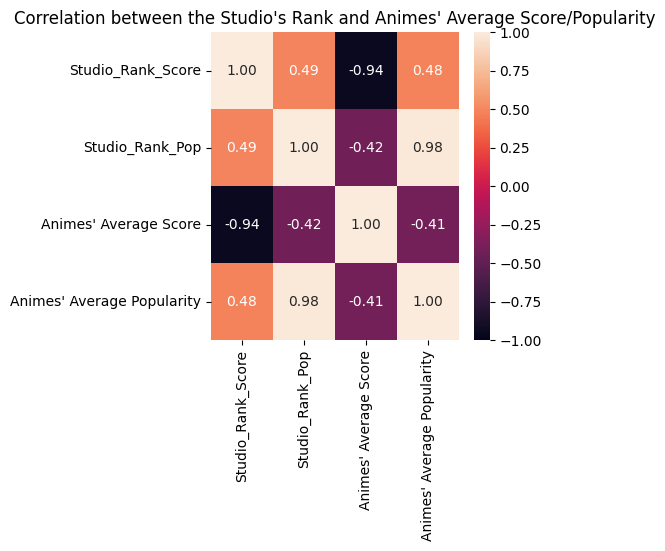

In [64]:
tmp = studio_df[["Studio_Rank_Score", 'Studio_Rank_Pop', "Animes' Average Score", "Animes' Average Popularity"]]
f, ax1 = plt.subplots(1,1,figsize=(4,4))
tmp = sb.heatmap(tmp.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
ax1.set(title="Correlation between the Studio's Rank and Animes' Average Score/Popularity")

#### From this heatmap, we can see that the Studios' Rank based upon their Animes Average Score had a very strong correlation of 0.94. the Studios' Rank based upon their Animes Average Popularity also had a very strong correlation of 0.98. 
#### Therefore, it can be concluded that the Studio has a high correlation with the Animes' Score and Popularity, and thus Studio Rank should be used as a predictor.

***

### Analysis of Duration against Score/ Popularity.

#### Here, we get the correlation heatmap of the Animes Duration in minutes against Animes Score/ Popularity.

[Text(0.5, 1.0, 'Correlation between Having "duration per episode" and "score" and "rank" of the anime')]

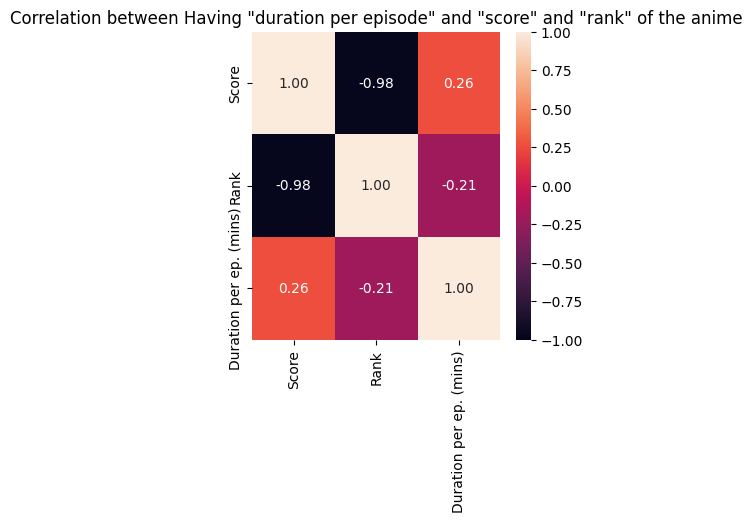

In [65]:
df_temp = clean_ani_s
df_temp.dropna(subset= ["Duration per ep. (mins)"])
tmp = df_temp[["Score","Rank", "Duration per ep. (mins)"]]

f, ax1 = plt.subplots(1,1,figsize=(4,4))
tmp = sb.heatmap(tmp.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
ax1.set(title='Correlation between Having "duration per episode" and "score" and "rank" of the anime')

#### It has been found that there is no significant correlation between an anime's duration, its score, and its rank. Therefore, we can conclude that the duration of an anime is not a strong predictor of its overall quality or popularity. While the duration of an anime may have some impact on the viewer's experience, it cannot be considered as a determining factor in evaluating the anime's success.

***

### Analysis of Members against Score/ Popularity.
#### Members refers to the total number of people who have that specific anime in their anime list, whether completed, watching, on hold or planned.

#### Here, we get the correlation heatmap of Members against Anime Score/ Popularity.

[Text(0.5, 1.0, 'Correlation between Having "Members" and "score" and "rank" of the anime')]

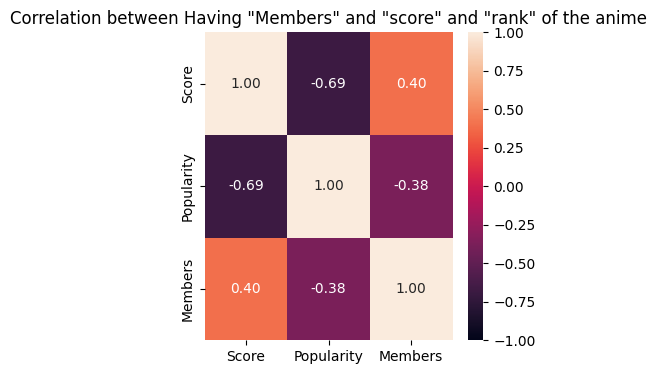

In [66]:
df_temp = clean_ani_s
df_temp.dropna(subset=["Members"])

tmp = df_temp[["Score","Popularity","Members"]]
f, ax1 = plt.subplots(1,1,figsize=(4,4))
tmp = sb.heatmap(tmp.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
ax1.set(title='Correlation between Having "Members" and "score" and "rank" of the anime')

#### The correlation between the Members and Score/ Popularity is only about 0.4 which is low. Thus it should not be used as a predictor.

## The end of EDA

***

# Machine Learning

## Marchine Learning: What makes an Anime Good

### Building a onehot Dataframe
#### Based on all the exploratory analysis done above, we take the variables with atleast moderate correlation with Popularity to be used as the predictors, this are: "Themes", "Studio Rank (sorted by Popularity)", "Voice Actor Rank (sorted by Popularity)", "Age Rating", "Main Avg" (Main Character Average Rank), "Char Avg" (The Average Character Rank).

#### The response variable was choosen to be Popularity due to it being of highest correlation with the predictor variables. Furthermore, Popularity as a variable is a weighted average of the Score and the number of members which make it a more fair evaluation of the Anime as Score alone may be skewed when the members who rated are mostly biased as with the Anime Community being very defensive of the Anime they like.

#### Themes being in a List format, we will need to make it onehot manually.

In [67]:
tmp = dict()

for thm in themes["Themes"]:
    tmp[thm] = []

for i, lis in enumerate(clean_ani_s["Themes"]):
    for thm in themes["Themes"]:
        if (thm in lis):
            tmp[thm].append(1.0)
        else:
            tmp[thm].append(0.0)
theme_oh = pd.DataFrame(tmp)
theme_oh

,School,Music,Mecha,Historical,Parody,Anthropomorphic,Military,Super Power,Mythology,Space,...,Organized Crime,Childcare,Idols (Male),Delinquents,Romantic Subtext,Medical,Crossdressing,Magical Sex Shift,Showbiz,High Stakes Game
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Getting the Studio Rank based on popularity for each Anime.

In [68]:
# Making a dictionary for each Studio and their rank (based on Anime Popularity)
std_dict = dict()
for i, std in enumerate(studio_df["Studios"]):
    std_dict[std] = studio_df["Studio_Rank_Pop"][i]

In [69]:
# Matching all the anime with their respective highest Studio Rank

tmp = [] # List to hold respective highest Studio Rank for each Anime
tmpN = [] # List to hold respective Studio for each Anime

for i, stdL in enumerate(clean_ani_s["Studios"]):
    # If no studio available skip
    if (stdL == []):
        tmp.append(np.nan)
        tmpN.append(np.nan)
        continue
    stdH = 99999
    stdN = np.nan
    # go through list of studios and get the highest ranked
    for std in stdL:
        stdRank = std_dict.get(std, 0)
        if (stdRank == 0):
            continue
        if (stdRank < stdH):
            stdH = stdRank
            stdN = std
    if (stdH == 99999):
        tmp.append(np.nan)
        tmpN.append(np.nan)
    else:
        tmp.append(stdH)
        tmpN.append(stdN)

In [70]:
# Making it a dataframe
ani_std_rank = pd.DataFrame()
ani_std_rank["Studio Rank"] = tmp
ani_std_rank["Studio"] = tmpN
ani_std_rank

,Studio Rank,Studio
0,42.0,Bones
1,244.0,Pierrot
2,45.0,White Fox
3,260.0,Bandai Namco Pictures
4,64.0,A-1 Pictures
...,...,...
18628,NaN,NaN
18629,170.0,J.C.Staff
18630,170.0,J.C.Staff
18631,746.0,Ripple Film


#### Getting the average Voice Actor Rank for each Anime.

In [71]:
# making a dictionary for each Voice Actor and their rank (based on Anime Popularity)
va_dict = dict()
for i, va in enumerate(voice_actor_df["Voice Actor"]):
    va_dict[va] = voice_actor_df["Voice_Actor_Rank_Pop"][i]

In [72]:
# Matching all the anime with their respective average Voice Actor Rank

tmp = [] # List to hold respective average Voice Actor Rank for each Anime
tmpA = [] # List to hold respective anime titles

for i, vaL in enumerate(clean_ani_s["Voice Actors"]):
    # If no voice actor data available skip
    if (vaL == [[]]):
        tmp.append(np.nan)
        continue
    tmp_ = []
    # Get all the voice actor ranks that are available
    for va in vaL:
        vaRank = va_dict.get(va, 0)
        if (vaRank != 0):
            tmp_.append(vaRank)
    # calculate the avarage
    if (len(tmp_) > 0):
        avg = sum(tmp_) / len(tmp_)
        tmp.append(avg)
    else:
        tmp.append(np.nan)
    tmpA.append(clean_ani_s["Title"][i])

In [73]:
# Making it a dataframe
ani_va_rank = pd.DataFrame()
ani_va_rank["Anime's title"] = tmpA
ani_va_rank["Voice Actor Rank"] = tmp
ani_va_rank

,Anime's title,Voice Actor Rank
0,Fullmetal Alchemist: Brotherhood,1285.2
1,Bleach: Sennen Kessen-hen,1311.4
2,Steins;Gate,1165.4
3,Gintama°,1166.5
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,700.5
...,...,...
18628,Aoi Taiken,NaN
18629,Ikenai Boy,NaN
18630,Sei Michaela Gakuen Hyouryuuki II,NaN
18631,Dream Hazard: Akuma no Program,NaN


#### Extracting categorical columns to make them onehot.

In [74]:
cat_oh = clean_ani_s[["Age Rating"]]

#### Extracting the numerical predictors and the response variable.

In [75]:
num_oh = clean_ani_s[["Main_avg", "Char_avg", "Popularity"]]

In [76]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ohe.fit(cat_oh)
cat_oh = pd.DataFrame(ohe.transform(cat_oh).toarray(), columns=ohe.get_feature_names_out(cat_oh.columns))

# Check the encoded variables
cat_oh.head()

,Age Rating_G - All Ages,Age Rating_None,Age Rating_PG - Children,Age Rating_PG-13 - Teens 13 or older,Age Rating_R - 17+ (violence & profanity),Age Rating_R+ - Mild Nudity,Age Rating_Rx - Hentai
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Concating the variables all together.

In [77]:
df_ohe = pd.concat([theme_oh, cat_oh, ani_std_rank["Studio Rank"], ani_va_rank["Voice Actor Rank"], num_oh], sort = False, axis = 1).reindex(index=theme_oh.index)
df_ohe = df_ohe.dropna()
df_ohe

,School,Music,Mecha,Historical,Parody,Anthropomorphic,Military,Super Power,Mythology,Space,...,Age Rating_PG - Children,Age Rating_PG-13 - Teens 13 or older,Age Rating_R - 17+ (violence & profanity),Age Rating_R+ - Mild Nudity,Age Rating_Rx - Hentai,Studio Rank,Voice Actor Rank,Main_avg,Char_avg,Popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,42.0,1285.200000,11.500000,88.200000,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,244.0,1311.400000,153.600000,161.875000,525
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,45.0,1165.400000,344.333333,1455.250000,13
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,260.0,1166.500000,534.000000,865.285714,336
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,64.0,700.500000,929.750000,1135.500000,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,474.0,2302.000000,114434.000000,114434.000000,10842
18522,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,758.0,3553.000000,85557.000000,85557.000000,10962
18543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,738.0,2806.000000,36559.000000,36559.000000,10044
18591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,701.0,2514.000000,21382.000000,24919.875000,8473


***

## Building the model: Linear Regression
#### Linear regression was considered due to the response variable being numerical. Furthermore, it was the first model we learnt and wanted to use this as a base to gauge correlation of the predictors to the response variable.

### Response: "Popularity".
### Predictors "Themes", "Studio Rank (sorted by Popularity)", "Voice Actor Rank (sorted by Popularity)", "Age Rating", "Main Avg" (Main Character Average Rank), "Char Avg" (The Average Character Rank).

In [78]:
# Extract Response and Predictors
y = pd.DataFrame(df_ohe["Popularity"])
x = pd.DataFrame(df_ohe.drop(columns=['Popularity']))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 2023)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (5876, 1) (5876, 61)
Test Set  : (1037, 1) (1037, 61)


In [79]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train, y_train)        # train the linear regression model

LinearRegression()

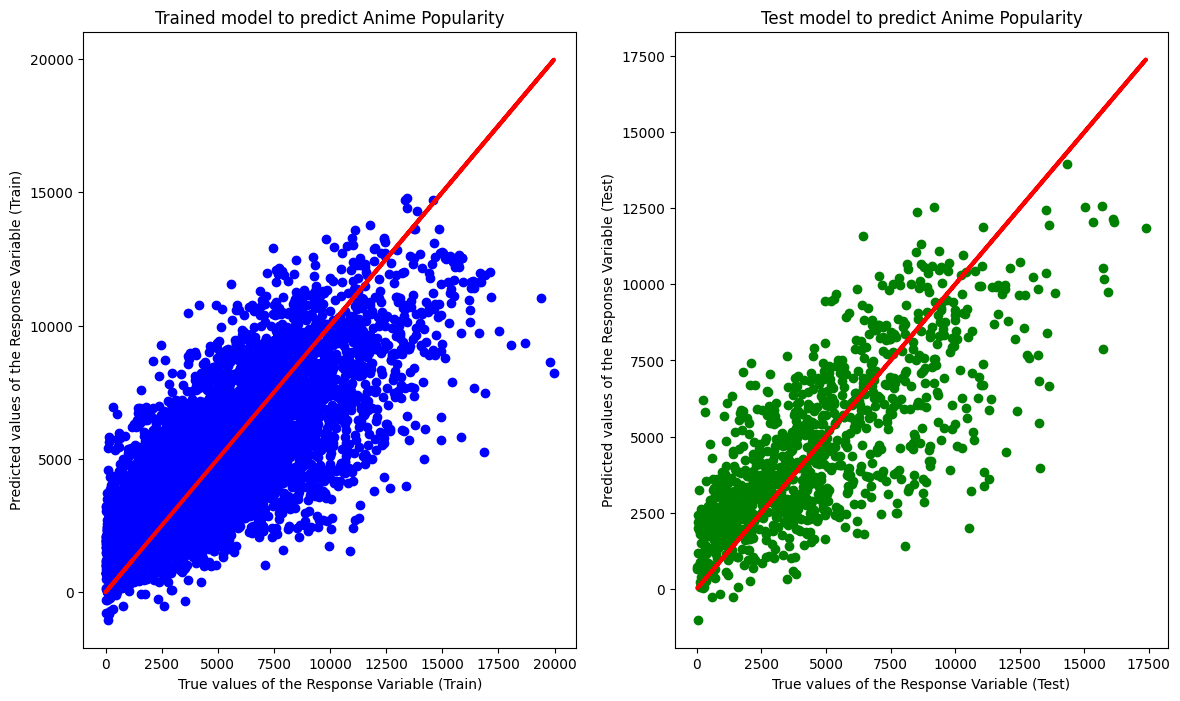

In [80]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(14, 8))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_title("Trained model to predict Anime Popularity")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_title("Test model to predict Anime Popularity")
plt.show()

In [81]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6012963606521916
Mean Squared Error (MSE) 	: 4915120.184791429

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5708211632144636
Mean Squared Error (MSE) 	: 4954797.134723904



#### Based on the explained variance being about 0.6, it can be seen that the predictors explained about 60% of the Animes Popularity (the higher the better).

#### As for the Mean Square Error, where the lower the Mean Square Error the better, it can be seen that this model predictions are moderately accurate (sqr(5x10<sup>6</sup>) = 2236). Being generally about 9% (2200/24000 = 9%) off the actual Popularity.

#### Therefore, this model works to a moderate degree in being able to predict the Popularity of an Anime.

***

## Building the model: Random Forest Regressor

#### RandomForestRegressor is considered as it can handle non-linear relationships between the input features and target variable, and can model interactions between variables, while avoiding overfitting. It is also able to handle missing values and outliers.Random Forest Regression also is robust to irrelevant features, which means that it can still perform well even if some of the features are not actually informative for the target variable.
#### To further improve the performance of the model, we utilized hyperparameter tuning through the use of RandomizedSearchCV. This method randomly samples combinations of hyperparameters from a specified parameter space and fits and evaluates corresponding models. By using RandomizedSearchCV, we can optimize the performance of our model and prevent overfitting by specifying a range of values for each hyperparameter that should be considered during the search. Ultimately, the best model and hyperparameters will be selected based on the best score achieved during the search.
### Response: "Popularity". 
### Predictor: "Themes", "Studio Rank (sorted by Popularity)", "Voice Actor Rank (sorted by Popularity)", "Age Rating", "Main Avg" (Main Character Average Rank), "Char Avg" (The Average Character Rank).



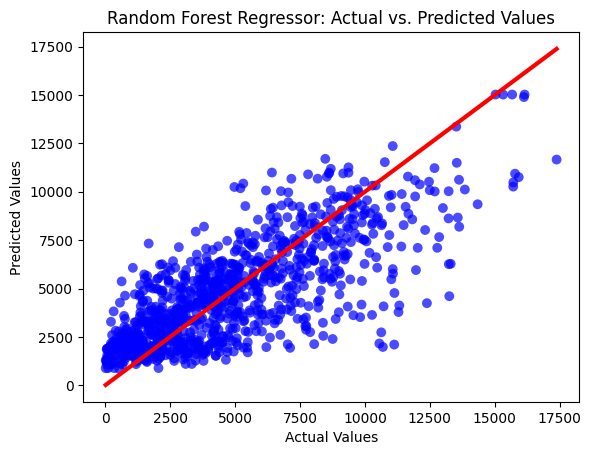

Best parameters: {'n_estimators': 650, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 46, 'max_depth': 10, 'bootstrap': False}
Best explained variance: 0.5924548214730403
Mean squared error: 4705040.206455898


In [82]:
x_var = df_ohe.drop("Popularity", axis=1)

# Convert column vector to 1D 
y_var = df_ohe["Popularity"].ravel()

# Split the Dataset into Train and Test , both sets are same as the sets used for above model
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.15, random_state = 2023)

# Define hyperparameter search space
param_dist = {
    "n_estimators": range(50, 1000, 50),
    "max_depth": [3, 5, 10, None],
    "max_features": range(1, x_train.shape[1]),
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 11),
    "bootstrap": [True, False]
}

# Create RandomForestRegressor model
rf = RandomForestRegressor()

# Perform hyperparameter tuning using RandomizedSearchCV and find the best hyperparameters
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=3, verbose=0, n_jobs=-1, random_state=2023)
random_search.fit(x_train, y_train)

# Create model with best hyperparameters
rf = RandomForestRegressor(
    n_estimators=random_search.best_params_['n_estimators'], 
    min_samples_split=random_search.best_params_['min_samples_split'], 
    min_samples_leaf=random_search.best_params_['min_samples_leaf'], 
    max_features=random_search.best_params_['max_features'], 
    max_depth=random_search.best_params_['max_depth'], 
    bootstrap=random_search.best_params_['bootstrap']
)

# Fit model to training data
rf.fit(x_train, y_train)

# Make predictions on test set
y_pred = rf.predict(x_test)

# Calculate mean squared error and R^2 of predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values using scatter plot
plt.scatter(y_test, y_pred, s=50, c='blue', alpha=0.7, edgecolors='none')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=3)
plt.title("Random Forest Regressor: Actual vs. Predicted Values")
plt.show()

# Print best hyperparameters
print("Best parameters:", random_search.best_params_)
# Print model performance metrics
print("Best explained variance:", r2)
print("Mean squared error:", mse)

#### The scatter plot of actual versus predicted values of popularity for shows a generally clustered distribution around the diagonal line.

In [83]:
# Evaluate the feature importance of the input features
importance = pd.DataFrame({"Feature": x_train.columns, "Importance": random_search.best_estimator_.feature_importances_})
importance = importance.sort_values("Importance", ascending=False)
importance.head()

,Feature,Importance
59,Main_avg,0.504308
58,Voice Actor Rank,0.222161
60,Char_avg,0.133737
57,Studio Rank,0.071432
50,Age Rating_G - All Ages,0.031146


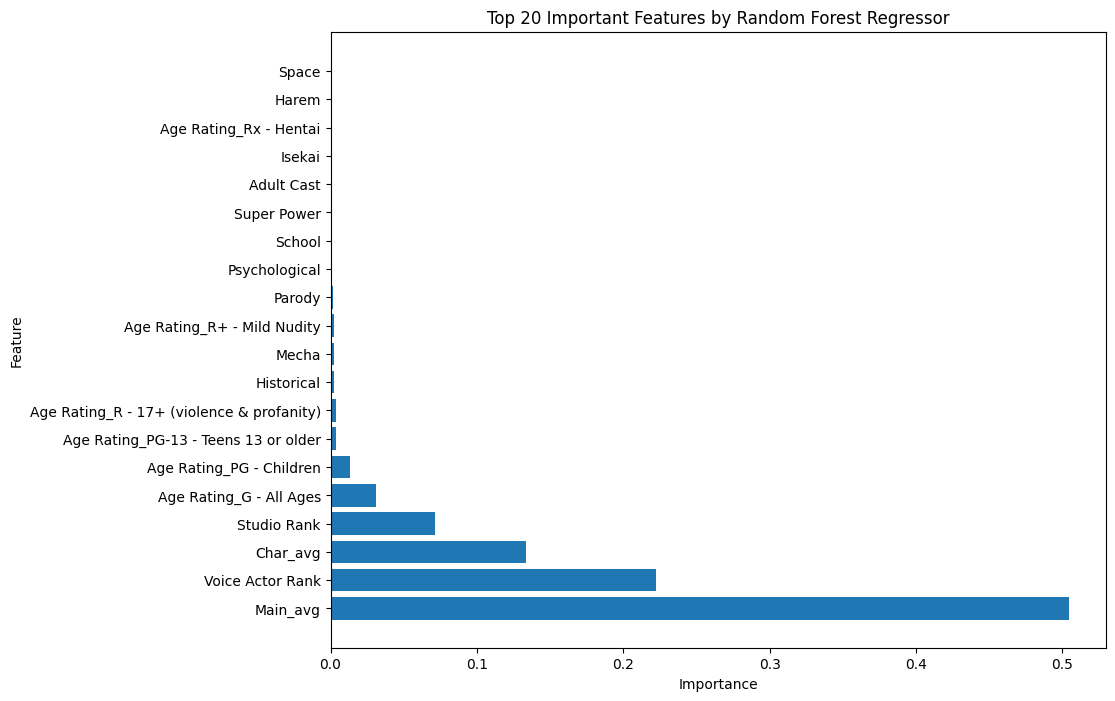

In [84]:
# Extract the top 20 important features 
top_features = importance.head(20)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.title('Top 20 Important Features by Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Our analysis utilized three cross-validations and the randomSearchCV function to determine a set of hyperparameters that consistently achieved an explained variance of approximately 0.59, indicating that our random forest model could capture around 59% of the data's variability.

#### However, when we assessed the model's performance using the mean squared error (MSE), we discovered that it was approximately 4,600,000, suggesting that there is room for improvement in reducing the prediction errors.

#### Among the predictors, we found that the most critical predictor was the average rank of the main characters, followed by the voice actor's rank for each anime.

#### Overall, while our random forest regressor model proved effective in predicting anime popularity, further hyperparameter tuning could enhance its performance even further.

***

## Building the model : Extreme Gradient Boosting

#### Given that our response variable is numeric, while most of our predictors are categorical, we decided to use Extreme Gradient Boosting (XGBoost) for our analysis. XGBoost is well-suited for handling mixed data types, including both categorical and continuous variables, making it an suitable choice for our dataset.

### Response variable: "Popularity".

### Predictors: "Themes", "Studio Rank (sorted by Popularity)", "Voice Actor Rank (sorted by Popularity)", "Age Rating", "Main Avg" (Main Character Average Rank), "Char Avg" (The Average Character Rank).

https://snyk.io/advisor/python/xgboost/functions/xgboost.XGBRegressor

https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [85]:
# Define the parameter space for RandomizedSearchCV
param_dist = {
    "n_estimators": range(50, 500, 50), #the number of boosting stages to perform (50 to 450, in steps of 50)
    "learning_rate": np.logspace(-4, 0, 5), #the step size shrinkage used in each boosting step (values between 0.0001 and 1.0, logarithmically spaced)
    "max_depth": range(3, 8), #the maximum depth of each decision tree (3 to 8)
    "subsample": np.linspace(0.5, 1, 6), #the fraction of training instances to be used for each tree (0.5 to 1, in steps of 0.1)
    "colsample_bytree": np.linspace(0.5, 1, 6), #the fraction of features to be used for each tree (0.5 to 1, in steps of 0.1)
    "gamma": np.logspace(-4, 0, 5), #the minimum loss reduction required to make a further partition on a leaf node of the tree (values between 0.0001 and 1.0, logarithmically spaced)
}

# Define the XGBoost model
model = XGBRegressor()

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, cv=3, verbose=0, n_jobs=-1,random_state = 2023)
random_search.fit(x_train, y_train)

# Use the best estimator to make predictions on the testing data
y_pred = random_search.best_estimator_.predict(x_test)

# Calculate the mean squared error and R^2 of the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [86]:
print("Best parameters:", random_search.best_params_)
print("Best explained variance:", random_search.best_score_)
print("Mean squared error:", mse)

Best parameters: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best explained variance: 0.6229724273541373
Mean squared error: 4267435.798278369


In [87]:
# Evaluate the feature importance of the input features
importance = pd.DataFrame({"Feature": x_train.columns, "Importance": random_search.best_estimator_.feature_importances_})
importance = importance.sort_values("Importance", ascending=False)
importance.head()

,Feature,Importance
59,Main_avg,0.089173
42,Idols (Male),0.059672
51,Age Rating_None,0.044788
50,Age Rating_G - All Ages,0.042839
52,Age Rating_PG - Children,0.037199


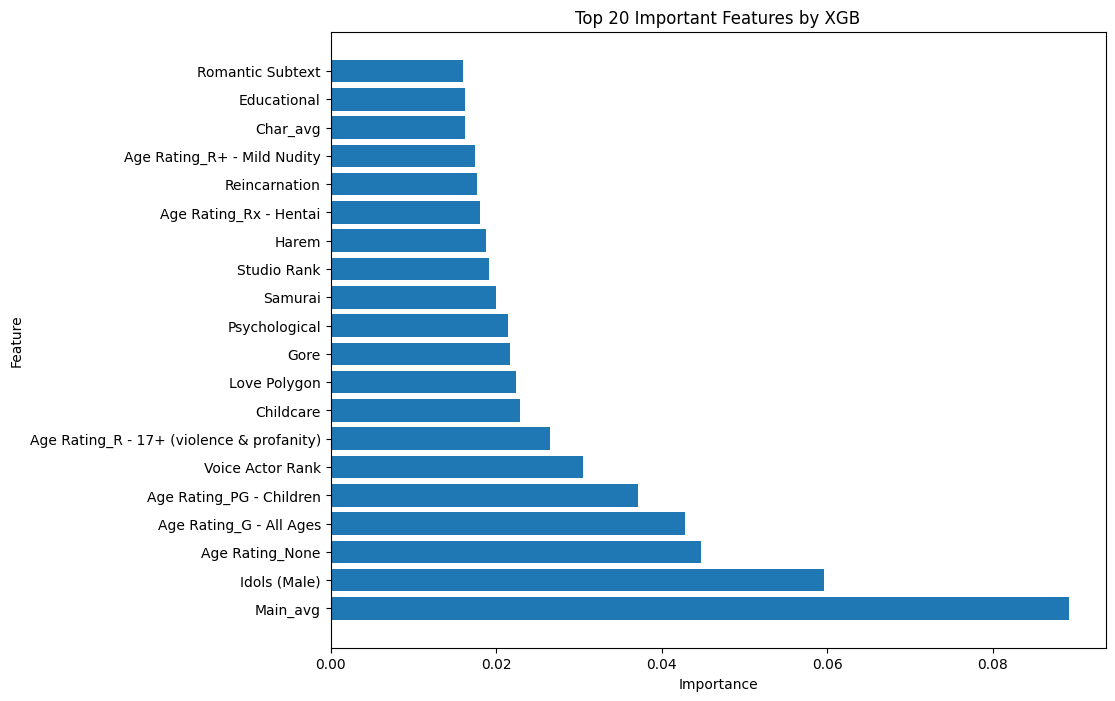

In [88]:
# Extract the top 20 important features
top_features = importance.head(20)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.title('Top 20 Important Features by XGB')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Based on the provided information, the best parameters for the XGBoost model were determined using randomSearchCV. The best parameters may vary, but the model consistently achieved a best explained variance of 0.62, showing that the varaibles are about 60% relevant to predicting popularity. The mean squared error of around 4,200,000, which is approximately off by 2449 for the popularity or around 9% (2050/24000 = 9%). This indicates that the model is of moderate precision and Accuracy.

#### Additionally, the feature importance analysis shows that the main character average and the themes "Idols" have higher importance in predicting the goodness of an anime. This suggests that these features plays a significant role in determining whether an anime is good or not. The age rating are also important features in determining anime popularity.

#### Although the result from the model might not be ideal, but understand that anime is a diverse medium with many unknown factors contributing to its popularity. Moreover, determining the quality of an anime is subjective and varies from person to person due to differing preferences. 

***

## Machine Learning: Predicting Character Ranks

#### As we can see that Character Rank is an important predictor of an Animes' Popularity, we wanted to see if we could create a model to predict the Character Ranks based on the character traits and features. Furthermore, through this model, we can also see if the character traits and/or features are correlated to the Character Rank.

#### Getting all the unique Tags amd the number of times each tag appears across all characters.

In [89]:
tags = dict()

for i,l in enumerate(clean_ani_t["Tags"]):
    for var in set(l):
        tags[var] = tags.get(var, 0) + 1

tags = pd.DataFrame(data = tags, index = ["Count"])
tags = tags.transpose()
tags = tags.reset_index()
tags = tags.rename({"index": "Tag"}, axis=1)
tags = tags.sort_values(by=['Count'], ascending=False)
tags = tags.loc[tags["Count"] > 10]
# reset the index
tags.index = range(len(tags))
tags

,Tag,Count
0,Adult,22403
1,Teenager,19873
2,High School Student,12918
3,Glasses,8991
4,Facial Hair,8805
...,...,...
563,Shin Koihime Musou,12
564,Shin Koihime Musou Otome Tairan,12
565,ItaKiss,11
566,Major Season 3,11


#### Remove all the tags that are Anime specific or do not make sense.

In [90]:
# manual cleaning of tags
# only run once
drop = [505, 518, 525, 527, 528, 533, 536, 541, 543, 544, 545, 547, 550, 551, 552, 553, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567]
tags = tags.drop(drop)
#print(tags.to_string())

#### For each Anime Character format the "Tags", "Hair_Color" and "Gender" in onehot format.

In [91]:
# the tags are in a List and have to be mannually made into one hot
tmp = dict()

for tag in tags["Tag"]:
    tmp[tag] = []

for i, lis in enumerate(clean_ani_t["Tags"]):
    for tag in tags["Tag"]:
        if (tag in lis):
            tmp[tag].append(1.0)
        else:
            tmp[tag].append(0.0)
char_oh = pd.DataFrame(tmp)

In [92]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# get the other columns that can use the oneHotEncoder
tmp = clean_ani_t[["Hair_Color", "Gender"]]

# OneHotEncoding of categorical predictors (not the response)
ohe.fit(tmp)
char_cat_oh = pd.DataFrame(ohe.transform(tmp).toarray(), columns=ohe.get_feature_names_out(tmp.columns))

#### Here, we include the character's rank into the dataframe.

In [93]:
# include the rank given the tags
char_oh["Rank"] = [x+1 for x in range(len(char_oh))]

#### Here, we combine all the needed columns into a single dataframe.

In [94]:
# concat the dataframes
char_df_ohe = pd.concat([char_oh, char_cat_oh], sort = False, axis = 1).reindex(index=char_oh.index)
char_df_ohe = char_df_ohe.dropna()

In [95]:
# Check onehot
char_df_ohe

,Adult,Teenager,High School Student,Glasses,Facial Hair,Ponytail,Hat,Magic User,Pigtails,Sword Fighter,...,Hair_Color_Verbal Tic,Hair_Color_Whale,Hair_Color_White Hair,Hair_Color_Wings,Hair_Color_Youkai,Hair_Color_Zashiki Warashi,Hair_Color_nan,Gender_Female,Gender_Male,Gender_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
104421,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
104422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
104423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Building the model: Linear Regression
#### Linear regression was considered due to the response variable being numerical and the number of columns we had to attempt to predict the Character Rank was very limited, thus a multivariate linear model was chosen.

### Response: "Rank".
### Predictors "Tag", "Hair_Color" and "Gender".

In [96]:
# Extract Response and Predictors
y_char = pd.DataFrame(char_df_ohe["Rank"])
x_char = pd.DataFrame(char_df_ohe.drop(columns=['Rank']))

# Split the Dataset into Train and Test
x_train_char, x_test_char, y_train_char, y_test_char = train_test_split(x_char, y_char, test_size = 0.90, random_state = 2023)

# Check the sample sizes
print("Train Set :", y_train_char.shape, x_train_char.shape)
print("Test Set  :", y_test_char.shape, x_test_char.shape)

Train Set : (10442, 1) (10442, 691)
Test Set  : (93983, 1) (93983, 691)


#### Attempt to use a onehot model to predict the Anime Character Ranking.

Text(0.5, 1.0, 'Trained model to predict Character Rank')

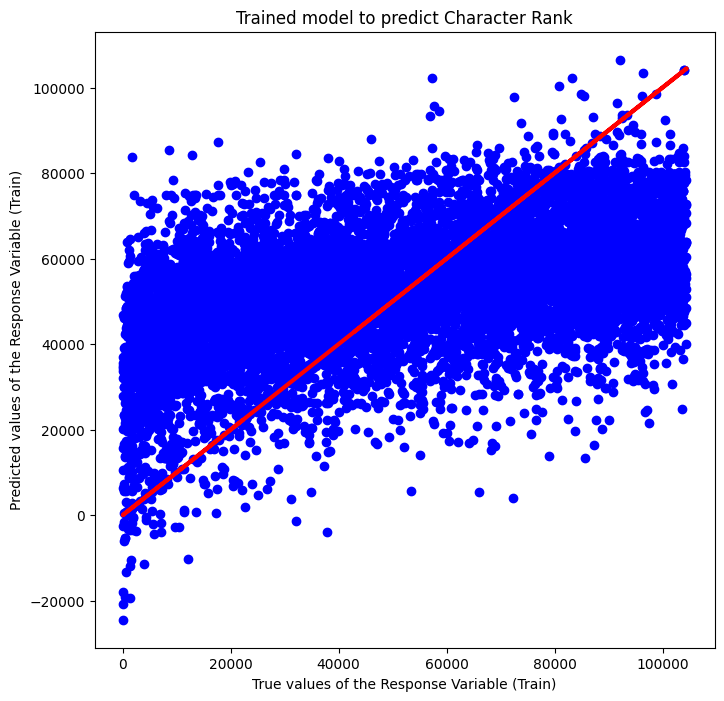

In [97]:
# Linear Regression using Train Data
linreg_tags = LinearRegression()         # create the linear regression object
linreg_tags.fit(x_train_char, y_train_char)        # train the linear regression model

# Predict the Total values from Predictors
y_train_char_pred = linreg_tags.predict(x_train_char)
y_test_char_pred = linreg_tags.predict(x_test_char)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(8, 8))
axes.scatter(y_train_char, y_train_char_pred, color = "blue")
axes.plot(y_train_char, y_train_char, 'r-', linewidth = 3)
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")
axes.set_title("Trained model to predict Character Rank")

In [98]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_tags.score(x_train_char, y_train_char))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_char, y_train_char_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.23036840657344104
Mean Squared Error (MSE) 	: 700235788.3489753



#### For the Explained Variance we can see that it is very low at approximately 0.23. This suggests that the tags, hair color, or even the gender of the character are of low correlation with the character rank. Hence, we can conclude that this model is not accurate, and these predictors are not what makes a character popular.

***

# Conclusions for Machine Learning

#### The 3 models used to predict the Popularity of an Anime all show that despite these measurable datapoints of "Themes", "Studio Rank (sorted by Popularity)", "Voice Actor Rank (sorted by Popularity)", "Age Rating", "Main Avg" (Main Character Average Rank), "Char Avg" (The Average Character Rank) being about 60% relevent, and the mean square errors are all moderately large (10%). This means that the models are generally all of Moderate Precision and Accuracy.

#### The interesting thing from the Extreme Gradient Boosting Model and the Random Forest Regressor both put character scores as a very important indicator of popularity, which suggests that the Anime Characters play a very big role in determining how good an Anime is. 

#### We can also see from the Liner Regression Model that the "Tags" (traits) of an anime character has quite little influence on the popularity (ranking) of the anime character, which suggests that it could possibly be the story that makes the character, a datapoint that we are currently lacking and much more subjective than quantifiable in nature.

#### These models work to a moderate degree in being able to predict the Popularity of an Anime (which shows how good an Anime is). These models can help to give a baseline reading of how popular an Anime might be. Though there is alot more that goes into an Anime than the quantifiable variables available here such as the story line, the budget, the marketing, whether the title is already well known etc. Anime is very diverse in nature, and maybe that is why we love it so much. We hope that even though this model may not be the best, it will help inspire someone to create one that will be the next greatest Anime.

#### Therefore, in conclusion, the Machine Learning Models have allowed us to see that alot more goes into making a good anime than quantifiable points. In which there is still a whole unexplored side such as the story and the feelings that an Anime evokes out of us that draws us to it.

## The end of Machine Learning